In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
job_postings = pd.read_csv('../Dataset/raw_job_postings.csv')
job_postings.head()

,Unnamed: 0,Title,Description,Company,Location
0,0,data scientist,Description\n\nProKarma is currently seeking a...,ProKarma,"Portland, OR 97204"
1,1,applied machine learning research engineer,"Summary\nPosted: Jun 12, 2019\nWeekly Hours: 4...",Apple,"Portland, OR 97225"
2,2,research analyst,"The Research Analyst, position is a highly eng...",Cushman & Wakefield,"Portland, OR 97201"
3,3,"data scientist (portland, or)",General Purpose\nProvides technical leadership...,PacifiCorp,"Portland, OR 97232"
4,4,data and research analyst,Brief Description of PSU/School/Dept\nPortland...,Portland State University,"Portland, OR 97201"


### Load gensim Glove Model (50 dimensions)

In [6]:
import gensim
print('gensim version: %s' % gensim.__version__)
glove_model = gensim.models.KeyedVectors.load_word2vec_format('glove/glove.6B.50d.txt')

gensim version: 3.6.0


### Remove stopwords

In [89]:
import spacy
spacy_nlp = spacy.load('en')

descriptions = job_postings['Description']
print(descriptions.describe())

count = 100
descriptions_short = descriptions[0:count]
descriptions_short.describe()

count                                                  3982
unique                                                 3798
top       iSenpai is a Woman Owned Small Business (WOSB)...
freq                                                     14
Name: Description, dtype: object


count                                                   100
unique                                                  100
top       JOB DESCRIPTION\nM Science is looking for a hi...
freq                                                      1
Name: Description, dtype: object

In [90]:
descriptions_tokens = []
for description in descriptions_short:
    descriptions_tokens.append([token.text.lower() for token in spacy_nlp(description) if not token.is_stop])

#print(descriptions_tokens)

In [91]:
comparisons_map = np.empty([count, count])
comparisons_list = []

start_time = time.time()
last_time = start_time

for num1, description_token in enumerate(descriptions_tokens):
    for num2, [token, description] in enumerate(zip(descriptions_tokens, descriptions)):
        if num1>num2:
            print('-' * 50)
            print('Comparing to desc#', num1, ' to desc#', num2)
            distance = glove_model.wmdistance(description_token, token)

            elapsed_time = time.time() - last_time             
            last_time = time.time()            
            cum_time = last_time-start_time
            
            print('Distance = %.4f' % distance, ". Comparison Time = ", elapsed_time, ". Cumulative Time = ", cum_time)
            comparisons_map[num1][num2]=distance

            comparisons_list.append([num1,num2,distance,elapsed_time,cum_time])
        else:
            comparisons_map[num1][num2]=0
            
        
elapsed_time = time.time() - start_time

--------------------------------------------------
Comparing to desc# 1  to desc# 0
Distance = 2.9319 . Comparison Time =  1.0483381748199463 . Cumulative Time =  1.0483381748199463
--------------------------------------------------
Comparing to desc# 2  to desc# 0
Distance = 2.9658 . Comparison Time =  0.8317399024963379 . Cumulative Time =  1.8800780773162842
--------------------------------------------------
Comparing to desc# 2  to desc# 1
Distance = 3.2150 . Comparison Time =  1.1104707717895508 . Cumulative Time =  2.990548849105835
--------------------------------------------------
Comparing to desc# 3  to desc# 0
Distance = 2.8617 . Comparison Time =  2.566420316696167 . Cumulative Time =  5.556969165802002
--------------------------------------------------
Comparing to desc# 3  to desc# 1
Distance = 2.9463 . Comparison Time =  4.499288558959961 . Cumulative Time =  10.056257724761963
--------------------------------------------------
Comparing to desc# 3  to desc# 2
Distance =

Comparing to desc# 10  to desc# 0
Distance = 2.8842 . Comparison Time =  1.7433335781097412 . Cumulative Time =  143.05294179916382
--------------------------------------------------
Comparing to desc# 10  to desc# 1
Distance = 2.7540 . Comparison Time =  2.1164121627807617 . Cumulative Time =  145.16935396194458
--------------------------------------------------
Comparing to desc# 10  to desc# 2
Distance = 3.1599 . Comparison Time =  1.901989221572876 . Cumulative Time =  147.07134318351746
--------------------------------------------------
Comparing to desc# 10  to desc# 3
Distance = 2.8691 . Comparison Time =  7.385496377944946 . Cumulative Time =  154.4568395614624
--------------------------------------------------
Comparing to desc# 10  to desc# 4
Distance = 2.9895 . Comparison Time =  8.44629979133606 . Cumulative Time =  162.90313935279846
--------------------------------------------------
Comparing to desc# 10  to desc# 5
Distance = 2.5332 . Comparison Time =  4.329163074493408

--------------------------------------------------
Comparing to desc# 13  to desc# 12
Distance = 3.2707 . Comparison Time =  0.6702680587768555 . Cumulative Time =  350.4294774532318
--------------------------------------------------
Comparing to desc# 14  to desc# 0
Distance = 3.6999 . Comparison Time =  0.32824015617370605 . Cumulative Time =  350.7577176094055
--------------------------------------------------
Comparing to desc# 14  to desc# 1
Distance = 3.3719 . Comparison Time =  0.38996076583862305 . Cumulative Time =  351.14767837524414
--------------------------------------------------
Comparing to desc# 14  to desc# 2
Distance = 3.5122 . Comparison Time =  0.34720373153686523 . Cumulative Time =  351.494882106781
--------------------------------------------------
Comparing to desc# 14  to desc# 3
Distance = 3.4275 . Comparison Time =  0.8407485485076904 . Cumulative Time =  352.3356306552887
--------------------------------------------------
Comparing to desc# 14  to desc# 4
D

Distance = 3.2631 . Comparison Time =  1.4860587120056152 . Cumulative Time =  505.8718419075012
--------------------------------------------------
Comparing to desc# 16  to desc# 15
Distance = 3.7745 . Comparison Time =  2.5024478435516357 . Cumulative Time =  508.37428975105286
--------------------------------------------------
Comparing to desc# 17  to desc# 0
Distance = 3.0947 . Comparison Time =  2.476930856704712 . Cumulative Time =  510.85122060775757
--------------------------------------------------
Comparing to desc# 17  to desc# 1
Distance = 2.9971 . Comparison Time =  3.3342654705047607 . Cumulative Time =  514.1854860782623
--------------------------------------------------
Comparing to desc# 17  to desc# 2
Distance = 2.8506 . Comparison Time =  2.1623570919036865 . Cumulative Time =  516.347843170166
--------------------------------------------------
Comparing to desc# 17  to desc# 3
Distance = 2.8284 . Comparison Time =  9.202389478683472 . Cumulative Time =  525.5502326

Distance = 2.9294 . Comparison Time =  2.151427745819092 . Cumulative Time =  740.9322934150696
--------------------------------------------------
Comparing to desc# 19  to desc# 9
Distance = 3.0124 . Comparison Time =  2.5234508514404297 . Cumulative Time =  743.45574426651
--------------------------------------------------
Comparing to desc# 19  to desc# 10
Distance = 2.8900 . Comparison Time =  3.276472568511963 . Cumulative Time =  746.732216835022
--------------------------------------------------
Comparing to desc# 19  to desc# 11
Distance = 2.6863 . Comparison Time =  12.707223653793335 . Cumulative Time =  759.4394404888153
--------------------------------------------------
Comparing to desc# 19  to desc# 12
Distance = 2.7971 . Comparison Time =  1.4354743957519531 . Cumulative Time =  760.8749148845673
--------------------------------------------------
Comparing to desc# 19  to desc# 13
Distance = 3.0660 . Comparison Time =  1.4801878929138184 . Cumulative Time =  762.35510277

Distance = 3.4539 . Comparison Time =  0.37995219230651855 . Cumulative Time =  890.5146236419678
--------------------------------------------------
Comparing to desc# 21  to desc# 15
Distance = 3.3817 . Comparison Time =  0.5615339279174805 . Cumulative Time =  891.0761575698853
--------------------------------------------------
Comparing to desc# 21  to desc# 16
Distance = 3.0180 . Comparison Time =  6.390286207199097 . Cumulative Time =  897.4664437770844
--------------------------------------------------
Comparing to desc# 21  to desc# 17
Distance = 2.9160 . Comparison Time =  3.2199559211730957 . Cumulative Time =  900.6863996982574
--------------------------------------------------
Comparing to desc# 21  to desc# 18
Distance = 3.1719 . Comparison Time =  4.516091346740723 . Cumulative Time =  905.2024910449982
--------------------------------------------------
Comparing to desc# 21  to desc# 19
Distance = 3.0598 . Comparison Time =  2.181318521499634 . Cumulative Time =  907.3838

Comparing to desc# 23  to desc# 16
Distance = 2.5055 . Comparison Time =  17.412729263305664 . Cumulative Time =  1175.5382418632507
--------------------------------------------------
Comparing to desc# 23  to desc# 17
Distance = 2.7883 . Comparison Time =  12.21373438835144 . Cumulative Time =  1187.7519762516022
--------------------------------------------------
Comparing to desc# 23  to desc# 18
Distance = 1.8212 . Comparison Time =  6.814365386962891 . Cumulative Time =  1194.566341638565
--------------------------------------------------
Comparing to desc# 23  to desc# 19
Distance = 2.7895 . Comparison Time =  7.823508024215698 . Cumulative Time =  1202.3898496627808
--------------------------------------------------
Comparing to desc# 23  to desc# 20
Distance = 2.8439 . Comparison Time =  7.253034830093384 . Cumulative Time =  1209.6428844928741
--------------------------------------------------
Comparing to desc# 23  to desc# 21
Distance = 3.0047 . Comparison Time =  5.896672964

--------------------------------------------------
Comparing to desc# 25  to desc# 14
Distance = 3.2080 . Comparison Time =  1.2688145637512207 . Cumulative Time =  1412.090982913971
--------------------------------------------------
Comparing to desc# 25  to desc# 15
Distance = 3.7122 . Comparison Time =  2.5070157051086426 . Cumulative Time =  1414.5979986190796
--------------------------------------------------
Comparing to desc# 25  to desc# 16
Distance = 2.5426 . Comparison Time =  19.983752489089966 . Cumulative Time =  1434.5817511081696
--------------------------------------------------
Comparing to desc# 25  to desc# 17
Distance = 2.7271 . Comparison Time =  13.005186796188354 . Cumulative Time =  1447.586937904358
--------------------------------------------------
Comparing to desc# 25  to desc# 18
Distance = 1.9544 . Comparison Time =  9.297937154769897 . Cumulative Time =  1456.8848750591278
--------------------------------------------------
Comparing to desc# 25  to desc# 

Distance = 2.9772 . Comparison Time =  5.7469751834869385 . Cumulative Time =  1804.5269796848297
--------------------------------------------------
Comparing to desc# 27  to desc# 8
Distance = 2.9866 . Comparison Time =  7.409787654876709 . Cumulative Time =  1811.9367673397064
--------------------------------------------------
Comparing to desc# 27  to desc# 9
Distance = 2.9969 . Comparison Time =  6.664565801620483 . Cumulative Time =  1818.601333141327
--------------------------------------------------
Comparing to desc# 27  to desc# 10
Distance = 2.9088 . Comparison Time =  9.22601056098938 . Cumulative Time =  1827.8273437023163
--------------------------------------------------
Comparing to desc# 27  to desc# 11
Distance = 2.3785 . Comparison Time =  24.057172298431396 . Cumulative Time =  1851.8845160007477
--------------------------------------------------
Comparing to desc# 27  to desc# 12
Distance = 3.0553 . Comparison Time =  5.291638374328613 . Cumulative Time =  1857.1761

Comparing to desc# 28  to desc# 25
Distance = 2.6094 . Comparison Time =  28.307753086090088 . Cumulative Time =  2381.0617759227753
--------------------------------------------------
Comparing to desc# 28  to desc# 26
Distance = 2.3345 . Comparison Time =  20.424671411514282 . Cumulative Time =  2401.4864473342896
--------------------------------------------------
Comparing to desc# 28  to desc# 27
Distance = 2.5035 . Comparison Time =  27.06463074684143 . Cumulative Time =  2428.551078081131
--------------------------------------------------
Comparing to desc# 29  to desc# 0
Distance = 3.0857 . Comparison Time =  2.4962074756622314 . Cumulative Time =  2431.047285556793
--------------------------------------------------
Comparing to desc# 29  to desc# 1
Distance = 3.0420 . Comparison Time =  3.369415283203125 . Cumulative Time =  2434.4167008399963
--------------------------------------------------
Comparing to desc# 29  to desc# 2
Distance = 3.0023 . Comparison Time =  2.42593955993

--------------------------------------------------
Comparing to desc# 30  to desc# 13
Distance = 3.7073 . Comparison Time =  0.4854609966278076 . Cumulative Time =  2639.506551027298
--------------------------------------------------
Comparing to desc# 30  to desc# 14
Distance = 3.7695 . Comparison Time =  0.2014930248260498 . Cumulative Time =  2639.708044052124
--------------------------------------------------
Comparing to desc# 30  to desc# 15
Distance = 3.6856 . Comparison Time =  0.3320786952972412 . Cumulative Time =  2640.0401227474213
--------------------------------------------------
Comparing to desc# 30  to desc# 16
Distance = 3.2851 . Comparison Time =  2.737785816192627 . Cumulative Time =  2642.777908563614
--------------------------------------------------
Comparing to desc# 30  to desc# 17
Distance = 3.4377 . Comparison Time =  1.548030138015747 . Cumulative Time =  2644.3259387016296
--------------------------------------------------
Comparing to desc# 30  to desc# 18

Distance = 2.7609 . Comparison Time =  12.463982105255127 . Cumulative Time =  2842.3836913108826
--------------------------------------------------
Comparing to desc# 31  to desc# 28
Distance = 2.6595 . Comparison Time =  17.649036645889282 . Cumulative Time =  2860.032727956772
--------------------------------------------------
Comparing to desc# 31  to desc# 29
Distance = 2.9154 . Comparison Time =  7.1647069454193115 . Cumulative Time =  2867.197434902191
--------------------------------------------------
Comparing to desc# 31  to desc# 30
Distance = 3.1413 . Comparison Time =  1.337810754776001 . Cumulative Time =  2868.535245656967
--------------------------------------------------
Comparing to desc# 32  to desc# 0
Distance = 3.1400 . Comparison Time =  1.2016172409057617 . Cumulative Time =  2869.736862897873
--------------------------------------------------
Comparing to desc# 32  to desc# 1
Distance = 2.6626 . Comparison Time =  1.3354933261871338 . Cumulative Time =  2871.072

Comparing to desc# 33  to desc# 9
Distance = 3.3371 . Comparison Time =  0.9694032669067383 . Cumulative Time =  3002.5819370746613
--------------------------------------------------
Comparing to desc# 33  to desc# 10
Distance = 3.2942 . Comparison Time =  1.6605889797210693 . Cumulative Time =  3004.2425260543823
--------------------------------------------------
Comparing to desc# 33  to desc# 11
Distance = 3.0885 . Comparison Time =  7.409437656402588 . Cumulative Time =  3011.651963710785
--------------------------------------------------
Comparing to desc# 33  to desc# 12
Distance = 3.2885 . Comparison Time =  0.8547413349151611 . Cumulative Time =  3012.5067050457
--------------------------------------------------
Comparing to desc# 33  to desc# 13
Distance = 3.3150 . Comparison Time =  0.6328449249267578 . Cumulative Time =  3013.139549970627
--------------------------------------------------
Comparing to desc# 33  to desc# 14
Distance = 3.4516 . Comparison Time =  0.25534653663

--------------------------------------------------
Comparing to desc# 34  to desc# 21
Distance = 3.2408 . Comparison Time =  4.086903095245361 . Cumulative Time =  3183.7001616954803
--------------------------------------------------
Comparing to desc# 34  to desc# 22
Distance = 3.0080 . Comparison Time =  9.837620973587036 . Cumulative Time =  3193.5377826690674
--------------------------------------------------
Comparing to desc# 34  to desc# 23
Distance = 2.0777 . Comparison Time =  7.084603309631348 . Cumulative Time =  3200.6223859786987
--------------------------------------------------
Comparing to desc# 34  to desc# 24
Distance = 3.1324 . Comparison Time =  2.9915196895599365 . Cumulative Time =  3203.6139056682587
--------------------------------------------------
Comparing to desc# 34  to desc# 25
Distance = 2.1600 . Comparison Time =  8.68623423576355 . Cumulative Time =  3212.300139904022
--------------------------------------------------
Comparing to desc# 34  to desc# 26


Distance = 2.9022 . Comparison Time =  8.644958734512329 . Cumulative Time =  3531.735848903656
--------------------------------------------------
Comparing to desc# 35  to desc# 32
Distance = 3.3365 . Comparison Time =  5.7229697704315186 . Cumulative Time =  3537.4588186740875
--------------------------------------------------
Comparing to desc# 35  to desc# 33
Distance = 3.0874 . Comparison Time =  2.7148780822753906 . Cumulative Time =  3540.173696756363
--------------------------------------------------
Comparing to desc# 35  to desc# 34
Distance = 2.9772 . Comparison Time =  10.082414627075195 . Cumulative Time =  3550.256111383438
--------------------------------------------------
Comparing to desc# 36  to desc# 0
Distance = 3.2659 . Comparison Time =  1.5137763023376465 . Cumulative Time =  3551.7698876857758
--------------------------------------------------
Comparing to desc# 36  to desc# 1
Distance = 3.0928 . Comparison Time =  2.309009313583374 . Cumulative Time =  3554.078

Comparing to desc# 37  to desc# 5
Distance = 2.9908 . Comparison Time =  4.549431085586548 . Cumulative Time =  3724.0916182994843
--------------------------------------------------
Comparing to desc# 37  to desc# 6
Distance = 3.1347 . Comparison Time =  1.6248159408569336 . Cumulative Time =  3725.716434240341
--------------------------------------------------
Comparing to desc# 37  to desc# 7
Distance = 3.0999 . Comparison Time =  1.8471643924713135 . Cumulative Time =  3727.5635986328125
--------------------------------------------------
Comparing to desc# 37  to desc# 8
Distance = 2.7763 . Comparison Time =  2.581364870071411 . Cumulative Time =  3730.144963502884
--------------------------------------------------
Comparing to desc# 37  to desc# 9
Distance = 3.1207 . Comparison Time =  2.5491769313812256 . Cumulative Time =  3732.694140434265
--------------------------------------------------
Comparing to desc# 37  to desc# 10
Distance = 2.6119 . Comparison Time =  3.12431573867797

--------------------------------------------------
Comparing to desc# 38  to desc# 13
Distance = 3.0867 . Comparison Time =  5.454666376113892 . Cumulative Time =  4022.1501977443695
--------------------------------------------------
Comparing to desc# 38  to desc# 14
Distance = 3.3568 . Comparison Time =  1.6306350231170654 . Cumulative Time =  4023.7808327674866
--------------------------------------------------
Comparing to desc# 38  to desc# 15
Distance = 3.7649 . Comparison Time =  3.086944103240967 . Cumulative Time =  4026.8677768707275
--------------------------------------------------
Comparing to desc# 38  to desc# 16
Distance = 0.2651 . Comparison Time =  3.09911847114563 . Cumulative Time =  4029.966895341873
--------------------------------------------------
Comparing to desc# 38  to desc# 17
Distance = 2.7771 . Comparison Time =  13.795475244522095 . Cumulative Time =  4043.7623705863953
--------------------------------------------------
Comparing to desc# 38  to desc# 18

Distance = 2.8931 . Comparison Time =  4.134323835372925 . Cumulative Time =  4404.066105365753
--------------------------------------------------
Comparing to desc# 39  to desc# 20
Distance = 3.0128 . Comparison Time =  3.5026376247406006 . Cumulative Time =  4407.568742990494
--------------------------------------------------
Comparing to desc# 39  to desc# 21
Distance = 2.9285 . Comparison Time =  2.240490436553955 . Cumulative Time =  4409.809233427048
--------------------------------------------------
Comparing to desc# 39  to desc# 22
Distance = 3.0052 . Comparison Time =  7.915523290634155 . Cumulative Time =  4417.724756717682
--------------------------------------------------
Comparing to desc# 39  to desc# 23
Distance = 2.9012 . Comparison Time =  8.838477373123169 . Cumulative Time =  4426.563234090805
--------------------------------------------------
Comparing to desc# 39  to desc# 24
Distance = 2.9962 . Comparison Time =  1.7438089847564697 . Cumulative Time =  4428.30704

Comparing to desc# 40  to desc# 25
Distance = 2.6891 . Comparison Time =  16.117008209228516 . Cumulative Time =  4756.031240940094
--------------------------------------------------
Comparing to desc# 40  to desc# 26
Distance = 2.1450 . Comparison Time =  10.768289566040039 . Cumulative Time =  4766.799530506134
--------------------------------------------------
Comparing to desc# 40  to desc# 27
Distance = 2.6317 . Comparison Time =  17.887248754501343 . Cumulative Time =  4784.686779260635
--------------------------------------------------
Comparing to desc# 40  to desc# 28
Distance = 2.5139 . Comparison Time =  22.628958463668823 . Cumulative Time =  4807.315737724304
--------------------------------------------------
Comparing to desc# 40  to desc# 29
Distance = 2.8905 . Comparison Time =  13.112096786499023 . Cumulative Time =  4820.427834510803
--------------------------------------------------
Comparing to desc# 40  to desc# 30
Distance = 3.6546 . Comparison Time =  2.448201417

--------------------------------------------------
Comparing to desc# 41  to desc# 30
Distance = 3.5090 . Comparison Time =  0.6791892051696777 . Cumulative Time =  5025.515921354294
--------------------------------------------------
Comparing to desc# 41  to desc# 31
Distance = 2.8679 . Comparison Time =  3.1419947147369385 . Cumulative Time =  5028.657916069031
--------------------------------------------------
Comparing to desc# 41  to desc# 32
Distance = 3.1888 . Comparison Time =  1.5179657936096191 . Cumulative Time =  5030.17588186264
--------------------------------------------------
Comparing to desc# 41  to desc# 33
Distance = 3.2732 . Comparison Time =  0.9025888442993164 . Cumulative Time =  5031.07847070694
--------------------------------------------------
Comparing to desc# 41  to desc# 34
Distance = 3.0036 . Comparison Time =  4.088237524032593 . Cumulative Time =  5035.166708230972
--------------------------------------------------
Comparing to desc# 41  to desc# 35
Di

Distance = 3.5093 . Comparison Time =  1.221773386001587 . Cumulative Time =  5201.518487691879
--------------------------------------------------
Comparing to desc# 42  to desc# 34
Distance = 3.1572 . Comparison Time =  5.478544235229492 . Cumulative Time =  5206.997031927109
--------------------------------------------------
Comparing to desc# 42  to desc# 35
Distance = 3.1063 . Comparison Time =  7.51841926574707 . Cumulative Time =  5214.515451192856
--------------------------------------------------
Comparing to desc# 42  to desc# 36
Distance = 3.3160 . Comparison Time =  3.268458366394043 . Cumulative Time =  5217.78390955925
--------------------------------------------------
Comparing to desc# 42  to desc# 37
Distance = 3.3278 . Comparison Time =  3.323366165161133 . Cumulative Time =  5221.107275724411
--------------------------------------------------
Comparing to desc# 42  to desc# 38
Distance = 2.9794 . Comparison Time =  11.192240238189697 . Cumulative Time =  5232.29951596

Comparing to desc# 43  to desc# 36
Distance = 3.1281 . Comparison Time =  6.123799562454224 . Cumulative Time =  5531.136625289917
--------------------------------------------------
Comparing to desc# 43  to desc# 37
Distance = 3.1276 . Comparison Time =  7.142532587051392 . Cumulative Time =  5538.279157876968
--------------------------------------------------
Comparing to desc# 43  to desc# 38
Distance = 2.7213 . Comparison Time =  17.24212622642517 . Cumulative Time =  5555.521284103394
--------------------------------------------------
Comparing to desc# 43  to desc# 39
Distance = 2.8353 . Comparison Time =  8.630414485931396 . Cumulative Time =  5564.151698589325
--------------------------------------------------
Comparing to desc# 43  to desc# 40
Distance = 2.8269 . Comparison Time =  13.68086838722229 . Cumulative Time =  5577.832566976547
--------------------------------------------------
Comparing to desc# 43  to desc# 41
Distance = 3.1342 . Comparison Time =  4.38778162002563

--------------------------------------------------
Comparing to desc# 44  to desc# 38
Distance = 2.5451 . Comparison Time =  32.57138276100159 . Cumulative Time =  6203.56615281105
--------------------------------------------------
Comparing to desc# 44  to desc# 39
Distance = 2.6862 . Comparison Time =  13.303324222564697 . Cumulative Time =  6216.869477033615
--------------------------------------------------
Comparing to desc# 44  to desc# 40
Distance = 2.7026 . Comparison Time =  27.563915491104126 . Cumulative Time =  6244.433392524719
--------------------------------------------------
Comparing to desc# 44  to desc# 41
Distance = 3.0701 . Comparison Time =  9.87582540512085 . Cumulative Time =  6254.30921792984
--------------------------------------------------
Comparing to desc# 44  to desc# 42
Distance = 3.0153 . Comparison Time =  11.292349338531494 . Cumulative Time =  6265.601567268372
--------------------------------------------------
Comparing to desc# 44  to desc# 43
Dist

--------------------------------------------------
Comparing to desc# 45  to desc# 39
Distance = 2.7948 . Comparison Time =  5.07073450088501 . Cumulative Time =  6526.765427827835
--------------------------------------------------
Comparing to desc# 45  to desc# 40
Distance = 2.7478 . Comparison Time =  10.643476486206055 . Cumulative Time =  6537.408904314041
--------------------------------------------------
Comparing to desc# 45  to desc# 41
Distance = 2.9947 . Comparison Time =  3.771413803100586 . Cumulative Time =  6541.180318117142
--------------------------------------------------
Comparing to desc# 45  to desc# 42
Distance = 3.0808 . Comparison Time =  4.594857454299927 . Cumulative Time =  6545.775175571442
--------------------------------------------------
Comparing to desc# 45  to desc# 43
Distance = 2.7899 . Comparison Time =  7.741581201553345 . Cumulative Time =  6553.516756772995
--------------------------------------------------
Comparing to desc# 45  to desc# 44
Dist

Distance = 2.7848 . Comparison Time =  8.9890615940094 . Cumulative Time =  6694.086707830429
--------------------------------------------------
Comparing to desc# 46  to desc# 39
Distance = 2.7906 . Comparison Time =  2.2630224227905273 . Cumulative Time =  6696.34973025322
--------------------------------------------------
Comparing to desc# 46  to desc# 40
Distance = 3.1298 . Comparison Time =  7.163537502288818 . Cumulative Time =  6703.513267755508
--------------------------------------------------
Comparing to desc# 46  to desc# 41
Distance = 2.7942 . Comparison Time =  1.0453507900238037 . Cumulative Time =  6704.558618545532
--------------------------------------------------
Comparing to desc# 46  to desc# 42
Distance = 2.9898 . Comparison Time =  1.484090805053711 . Cumulative Time =  6706.042709350586
--------------------------------------------------
Comparing to desc# 46  to desc# 43
Distance = 2.8525 . Comparison Time =  4.084213972091675 . Cumulative Time =  6710.12692332

Comparing to desc# 47  to desc# 37
Distance = 3.1551 . Comparison Time =  10.874786853790283 . Cumulative Time =  7116.673532247543
--------------------------------------------------
Comparing to desc# 47  to desc# 38
Distance = 2.5323 . Comparison Time =  20.738383293151855 . Cumulative Time =  7137.411915540695
--------------------------------------------------
Comparing to desc# 47  to desc# 39
Distance = 3.0088 . Comparison Time =  11.05423378944397 . Cumulative Time =  7148.466149330139
--------------------------------------------------
Comparing to desc# 47  to desc# 40
Distance = 2.7494 . Comparison Time =  17.91050696372986 . Cumulative Time =  7166.376656293869
--------------------------------------------------
Comparing to desc# 47  to desc# 41
Distance = 3.1994 . Comparison Time =  7.822032928466797 . Cumulative Time =  7174.198689222336
--------------------------------------------------
Comparing to desc# 47  to desc# 42
Distance = 3.2495 . Comparison Time =  10.80346417427

--------------------------------------------------
Comparing to desc# 48  to desc# 35
Distance = 2.8246 . Comparison Time =  10.524252653121948 . Cumulative Time =  7513.870618104935
--------------------------------------------------
Comparing to desc# 48  to desc# 36
Distance = 3.3484 . Comparison Time =  6.021829128265381 . Cumulative Time =  7519.8924472332
--------------------------------------------------
Comparing to desc# 48  to desc# 37
Distance = 2.5655 . Comparison Time =  5.3233866691589355 . Cumulative Time =  7525.215833902359
--------------------------------------------------
Comparing to desc# 48  to desc# 38
Distance = 2.7120 . Comparison Time =  16.31837749481201 . Cumulative Time =  7541.534211397171
--------------------------------------------------
Comparing to desc# 48  to desc# 39
Distance = 2.9547 . Comparison Time =  6.424354791641235 . Cumulative Time =  7547.958566188812
--------------------------------------------------
Comparing to desc# 48  to desc# 40
Dist

Distance = 2.9699 . Comparison Time =  15.530972719192505 . Cumulative Time =  8012.104058980942
--------------------------------------------------
Comparing to desc# 49  to desc# 32
Distance = 3.2502 . Comparison Time =  8.697826862335205 . Cumulative Time =  8020.801885843277
--------------------------------------------------
Comparing to desc# 49  to desc# 33
Distance = 3.2738 . Comparison Time =  5.287861585617065 . Cumulative Time =  8026.089747428894
--------------------------------------------------
Comparing to desc# 49  to desc# 34
Distance = 2.2619 . Comparison Time =  10.010481595993042 . Cumulative Time =  8036.100229024887
--------------------------------------------------
Comparing to desc# 49  to desc# 35
Distance = 2.7295 . Comparison Time =  19.90824317932129 . Cumulative Time =  8056.008472204208
--------------------------------------------------
Comparing to desc# 49  to desc# 36
Distance = 2.3766 . Comparison Time =  7.088833808898926 . Cumulative Time =  8063.09730

Comparing to desc# 50  to desc# 27
Distance = 2.6877 . Comparison Time =  6.705817461013794 . Cumulative Time =  8340.521513462067
--------------------------------------------------
Comparing to desc# 50  to desc# 28
Distance = 2.7042 . Comparison Time =  9.855118751525879 . Cumulative Time =  8350.376632213593
--------------------------------------------------
Comparing to desc# 50  to desc# 29
Distance = 2.8158 . Comparison Time =  3.2449827194213867 . Cumulative Time =  8353.621614933014
--------------------------------------------------
Comparing to desc# 50  to desc# 30
Distance = 3.2401 . Comparison Time =  0.6622796058654785 . Cumulative Time =  8354.28389453888
--------------------------------------------------
Comparing to desc# 50  to desc# 31
Distance = 2.6751 . Comparison Time =  3.269420623779297 . Cumulative Time =  8357.553315162659
--------------------------------------------------
Comparing to desc# 50  to desc# 32
Distance = 2.8181 . Comparison Time =  1.5149455070495

--------------------------------------------------
Comparing to desc# 51  to desc# 22
Distance = 3.0785 . Comparison Time =  8.737105131149292 . Cumulative Time =  8534.65378665924
--------------------------------------------------
Comparing to desc# 51  to desc# 23
Distance = 2.1090 . Comparison Time =  5.819959402084351 . Cumulative Time =  8540.473746061325
--------------------------------------------------
Comparing to desc# 51  to desc# 24
Distance = 3.3682 . Comparison Time =  2.557466506958008 . Cumulative Time =  8543.031212568283
--------------------------------------------------
Comparing to desc# 51  to desc# 25
Distance = 2.1375 . Comparison Time =  7.635488748550415 . Cumulative Time =  8550.666701316833
--------------------------------------------------
Comparing to desc# 51  to desc# 26
Distance = 2.9833 . Comparison Time =  9.949989318847656 . Cumulative Time =  8560.616690635681
--------------------------------------------------
Comparing to desc# 51  to desc# 27
Dista

--------------------------------------------------
Comparing to desc# 52  to desc# 16
Distance = 2.7215 . Comparison Time =  7.780777931213379 . Cumulative Time =  8781.676795959473
--------------------------------------------------
Comparing to desc# 52  to desc# 17
Distance = 2.7402 . Comparison Time =  3.655775785446167 . Cumulative Time =  8785.332571744919
--------------------------------------------------
Comparing to desc# 52  to desc# 18
Distance = 2.8604 . Comparison Time =  4.6099653244018555 . Cumulative Time =  8789.94253706932
--------------------------------------------------
Comparing to desc# 52  to desc# 19
Distance = 2.8920 . Comparison Time =  2.630434274673462 . Cumulative Time =  8792.572971343994
--------------------------------------------------
Comparing to desc# 52  to desc# 20
Distance = 2.9590 . Comparison Time =  2.233339309692383 . Cumulative Time =  8794.806310653687
--------------------------------------------------
Comparing to desc# 52  to desc# 21
Dist

--------------------------------------------------
Comparing to desc# 53  to desc# 9
Distance = 2.9685 . Comparison Time =  12.688615083694458 . Cumulative Time =  9058.68695807457
--------------------------------------------------
Comparing to desc# 53  to desc# 10
Distance = 2.6552 . Comparison Time =  13.904645204544067 . Cumulative Time =  9072.591603279114
--------------------------------------------------
Comparing to desc# 53  to desc# 11
Distance = 2.3627 . Comparison Time =  36.25072741508484 . Cumulative Time =  9108.842330694199
--------------------------------------------------
Comparing to desc# 53  to desc# 12
Distance = 2.8366 . Comparison Time =  7.100722789764404 . Cumulative Time =  9115.943053483963
--------------------------------------------------
Comparing to desc# 53  to desc# 13
Distance = 3.1894 . Comparison Time =  7.908718585968018 . Cumulative Time =  9123.851772069931
--------------------------------------------------
Comparing to desc# 53  to desc# 14
Dist

Distance = 3.0217 . Comparison Time =  3.424839496612549 . Cumulative Time =  9824.858477592468
--------------------------------------------------
Comparing to desc# 54  to desc# 1
Distance = 3.0885 . Comparison Time =  4.617133140563965 . Cumulative Time =  9829.475610733032
--------------------------------------------------
Comparing to desc# 54  to desc# 2
Distance = 3.1054 . Comparison Time =  4.117100715637207 . Cumulative Time =  9833.59271144867
--------------------------------------------------
Comparing to desc# 54  to desc# 3
Distance = 2.6337 . Comparison Time =  9.971048355102539 . Cumulative Time =  9843.563759803772
--------------------------------------------------
Comparing to desc# 54  to desc# 4
Distance = 2.7575 . Comparison Time =  18.060492277145386 . Cumulative Time =  9861.624252080917
--------------------------------------------------
Comparing to desc# 54  to desc# 5
Distance = 2.9438 . Comparison Time =  11.218504905700684 . Cumulative Time =  9872.84275698661

Comparing to desc# 54  to desc# 45
Distance = 2.7094 . Comparison Time =  8.822269201278687 . Cumulative Time =  10247.354974746704
--------------------------------------------------
Comparing to desc# 54  to desc# 46
Distance = 3.0251 . Comparison Time =  3.930845022201538 . Cumulative Time =  10251.285819768906
--------------------------------------------------
Comparing to desc# 54  to desc# 47
Distance = 2.7401 . Comparison Time =  16.659937143325806 . Cumulative Time =  10267.945756912231
--------------------------------------------------
Comparing to desc# 54  to desc# 48
Distance = 2.8747 . Comparison Time =  11.704697132110596 . Cumulative Time =  10279.650454044342
--------------------------------------------------
Comparing to desc# 54  to desc# 49
Distance = 2.7666 . Comparison Time =  17.42353892326355 . Cumulative Time =  10297.073992967606
--------------------------------------------------
Comparing to desc# 54  to desc# 50
Distance = 2.9147 . Comparison Time =  4.7047529

--------------------------------------------------
Comparing to desc# 55  to desc# 36
Distance = 3.2249 . Comparison Time =  4.809821844100952 . Cumulative Time =  10587.846379041672
--------------------------------------------------
Comparing to desc# 55  to desc# 37
Distance = 2.6877 . Comparison Time =  5.378992080688477 . Cumulative Time =  10593.22537112236
--------------------------------------------------
Comparing to desc# 55  to desc# 38
Distance = 2.7001 . Comparison Time =  13.981198072433472 . Cumulative Time =  10607.206569194794
--------------------------------------------------
Comparing to desc# 55  to desc# 39
Distance = 2.8717 . Comparison Time =  6.19701075553894 . Cumulative Time =  10613.403579950333
--------------------------------------------------
Comparing to desc# 55  to desc# 40
Distance = 2.9922 . Comparison Time =  10.74545407295227 . Cumulative Time =  10624.149034023285
--------------------------------------------------
Comparing to desc# 55  to desc# 41


Distance = 3.4152 . Comparison Time =  3.4000141620635986 . Cumulative Time =  10779.88672876358
--------------------------------------------------
Comparing to desc# 56  to desc# 26
Distance = 3.2963 . Comparison Time =  2.5253095626831055 . Cumulative Time =  10782.412038326263
--------------------------------------------------
Comparing to desc# 56  to desc# 27
Distance = 3.3775 . Comparison Time =  3.2694408893585205 . Cumulative Time =  10785.681479215622
--------------------------------------------------
Comparing to desc# 56  to desc# 28
Distance = 3.2190 . Comparison Time =  4.7875776290893555 . Cumulative Time =  10790.469056844711
--------------------------------------------------
Comparing to desc# 56  to desc# 29
Distance = 3.4749 . Comparison Time =  1.734501600265503 . Cumulative Time =  10792.203558444977
--------------------------------------------------
Comparing to desc# 56  to desc# 30
Distance = 0.7379 . Comparison Time =  0.248307466506958 . Cumulative Time =  1079

--------------------------------------------------
Comparing to desc# 57  to desc# 14
Distance = 3.4473 . Comparison Time =  0.8839108943939209 . Cumulative Time =  10920.488355875015
--------------------------------------------------
Comparing to desc# 57  to desc# 15
Distance = 3.7109 . Comparison Time =  1.187504529953003 . Cumulative Time =  10921.675860404968
--------------------------------------------------
Comparing to desc# 57  to desc# 16
Distance = 2.8213 . Comparison Time =  14.972671031951904 . Cumulative Time =  10936.64853143692
--------------------------------------------------
Comparing to desc# 57  to desc# 17
Distance = 2.6978 . Comparison Time =  6.508204936981201 . Cumulative Time =  10943.156736373901
--------------------------------------------------
Comparing to desc# 57  to desc# 18
Distance = 2.6458 . Comparison Time =  9.550090551376343 . Cumulative Time =  10952.706826925278
--------------------------------------------------
Comparing to desc# 57  to desc# 1

Distance = 3.1417 . Comparison Time =  8.049410104751587 . Cumulative Time =  11263.789631128311
--------------------------------------------------
Comparing to desc# 58  to desc# 2
Distance = 3.0469 . Comparison Time =  5.622441530227661 . Cumulative Time =  11269.412072658539
--------------------------------------------------
Comparing to desc# 58  to desc# 3
Distance = 2.4733 . Comparison Time =  15.035540580749512 . Cumulative Time =  11284.447613239288
--------------------------------------------------
Comparing to desc# 58  to desc# 4
Distance = 2.8725 . Comparison Time =  19.3746554851532 . Cumulative Time =  11303.822268724442
--------------------------------------------------
Comparing to desc# 58  to desc# 5
Distance = 2.9338 . Comparison Time =  15.800925016403198 . Cumulative Time =  11319.623193740845
--------------------------------------------------
Comparing to desc# 58  to desc# 6
Distance = 3.1985 . Comparison Time =  5.717411518096924 . Cumulative Time =  11325.34060

--------------------------------------------------
Comparing to desc# 58  to desc# 46
Distance = 2.8078 . Comparison Time =  6.959162712097168 . Cumulative Time =  11842.736060857773
--------------------------------------------------
Comparing to desc# 58  to desc# 47
Distance = 2.7907 . Comparison Time =  20.983415126800537 . Cumulative Time =  11863.719475984573
--------------------------------------------------
Comparing to desc# 58  to desc# 48
Distance = 2.7767 . Comparison Time =  14.969756841659546 . Cumulative Time =  11878.689232826233
--------------------------------------------------
Comparing to desc# 58  to desc# 49
Distance = 2.8447 . Comparison Time =  25.8503155708313 . Cumulative Time =  11904.539548397064
--------------------------------------------------
Comparing to desc# 58  to desc# 50
Distance = 2.9193 . Comparison Time =  7.510756015777588 . Cumulative Time =  11912.050304412842
--------------------------------------------------
Comparing to desc# 58  to desc# 5

Distance = 3.3416 . Comparison Time =  5.431139945983887 . Cumulative Time =  12261.65726518631
--------------------------------------------------
Comparing to desc# 59  to desc# 33
Distance = 3.0713 . Comparison Time =  2.9283792972564697 . Cumulative Time =  12264.585644483566
--------------------------------------------------
Comparing to desc# 59  to desc# 34
Distance = 2.1765 . Comparison Time =  6.522217273712158 . Cumulative Time =  12271.107861757278
--------------------------------------------------
Comparing to desc# 59  to desc# 35
Distance = 2.4855 . Comparison Time =  9.713388919830322 . Cumulative Time =  12280.821250677109
--------------------------------------------------
Comparing to desc# 59  to desc# 36
Distance = 2.3121 . Comparison Time =  3.8918983936309814 . Cumulative Time =  12284.71314907074
--------------------------------------------------
Comparing to desc# 59  to desc# 37
Distance = 3.1916 . Comparison Time =  9.268346309661865 . Cumulative Time =  12293.9

Comparing to desc# 60  to desc# 18
Distance = 2.6157 . Comparison Time =  10.834107637405396 . Cumulative Time =  12670.446153879166
--------------------------------------------------
Comparing to desc# 60  to desc# 19
Distance = 3.2926 . Comparison Time =  9.374193906784058 . Cumulative Time =  12679.82034778595
--------------------------------------------------
Comparing to desc# 60  to desc# 20
Distance = 3.2496 . Comparison Time =  7.347888708114624 . Cumulative Time =  12687.168236494064
--------------------------------------------------
Comparing to desc# 60  to desc# 21
Distance = 3.2690 . Comparison Time =  5.437015771865845 . Cumulative Time =  12692.60525226593
--------------------------------------------------
Comparing to desc# 60  to desc# 22
Distance = 3.0183 . Comparison Time =  13.634044170379639 . Cumulative Time =  12706.23929643631
--------------------------------------------------
Comparing to desc# 60  to desc# 23
Distance = 2.6236 . Comparison Time =  13.934900760

--------------------------------------------------
Comparing to desc# 61  to desc# 3
Distance = 2.5605 . Comparison Time =  7.594589948654175 . Cumulative Time =  13148.898735284805
--------------------------------------------------
Comparing to desc# 61  to desc# 4
Distance = 2.9467 . Comparison Time =  12.15834093093872 . Cumulative Time =  13161.057076215744
--------------------------------------------------
Comparing to desc# 61  to desc# 5
Distance = 2.7946 . Comparison Time =  6.6052327156066895 . Cumulative Time =  13167.66230893135
--------------------------------------------------
Comparing to desc# 61  to desc# 6
Distance = 3.1994 . Comparison Time =  2.557399034500122 . Cumulative Time =  13170.21970796585
--------------------------------------------------
Comparing to desc# 61  to desc# 7
Distance = 3.0533 . Comparison Time =  2.3927741050720215 . Cumulative Time =  13172.612482070923
--------------------------------------------------
Comparing to desc# 61  to desc# 8
Dista

Distance = 3.0054 . Comparison Time =  13.288695096969604 . Cumulative Time =  13441.243244409561
--------------------------------------------------
Comparing to desc# 61  to desc# 48
Distance = 2.8131 . Comparison Time =  8.507185220718384 . Cumulative Time =  13449.75042963028
--------------------------------------------------
Comparing to desc# 61  to desc# 49
Distance = 2.9424 . Comparison Time =  13.631635904312134 . Cumulative Time =  13463.382065534592
--------------------------------------------------
Comparing to desc# 61  to desc# 50
Distance = 2.7092 . Comparison Time =  2.858837127685547 . Cumulative Time =  13466.240902662277
--------------------------------------------------
Comparing to desc# 61  to desc# 51
Distance = 3.1039 . Comparison Time =  5.442456245422363 . Cumulative Time =  13471.6833589077
--------------------------------------------------
Comparing to desc# 61  to desc# 52
Distance = 2.4453 . Comparison Time =  2.6421780586242676 . Cumulative Time =  13474.3

--------------------------------------------------
Comparing to desc# 62  to desc# 31
Distance = 3.0033 . Comparison Time =  6.093921422958374 . Cumulative Time =  13688.417439222336
--------------------------------------------------
Comparing to desc# 62  to desc# 32
Distance = 3.1207 . Comparison Time =  2.9032299518585205 . Cumulative Time =  13691.320669174194
--------------------------------------------------
Comparing to desc# 62  to desc# 33
Distance = 3.3026 . Comparison Time =  1.540942668914795 . Cumulative Time =  13692.86161184311
--------------------------------------------------
Comparing to desc# 62  to desc# 34
Distance = 2.8647 . Comparison Time =  5.263596057891846 . Cumulative Time =  13698.125207901001
--------------------------------------------------
Comparing to desc# 62  to desc# 35
Distance = 2.8359 . Comparison Time =  5.683457136154175 . Cumulative Time =  13703.808665037155
--------------------------------------------------
Comparing to desc# 62  to desc# 36

Distance = 3.0352 . Comparison Time =  1.8730974197387695 . Cumulative Time =  13926.09248995781
--------------------------------------------------
Comparing to desc# 63  to desc# 14
Distance = 3.5653 . Comparison Time =  0.7410428524017334 . Cumulative Time =  13926.833532810211
--------------------------------------------------
Comparing to desc# 63  to desc# 15
Distance = 3.6863 . Comparison Time =  1.611659288406372 . Cumulative Time =  13928.445192098618
--------------------------------------------------
Comparing to desc# 63  to desc# 16
Distance = 2.8634 . Comparison Time =  14.303098440170288 . Cumulative Time =  13942.748290538788
--------------------------------------------------
Comparing to desc# 63  to desc# 17
Distance = 2.8536 . Comparison Time =  6.60034704208374 . Cumulative Time =  13949.348637580872
--------------------------------------------------
Comparing to desc# 63  to desc# 18
Distance = 3.0057 . Comparison Time =  9.107098579406738 . Cumulative Time =  13958.

--------------------------------------------------
Comparing to desc# 63  to desc# 58
Distance = 2.8167 . Comparison Time =  11.723834037780762 . Cumulative Time =  14256.623757123947
--------------------------------------------------
Comparing to desc# 63  to desc# 59
Distance = 3.0200 . Comparison Time =  8.565004348754883 . Cumulative Time =  14265.188761472702
--------------------------------------------------
Comparing to desc# 63  to desc# 60
Distance = 2.9577 . Comparison Time =  10.446841478347778 . Cumulative Time =  14275.63560295105
--------------------------------------------------
Comparing to desc# 63  to desc# 61
Distance = 2.6240 . Comparison Time =  5.047971963882446 . Cumulative Time =  14280.683574914932
--------------------------------------------------
Comparing to desc# 63  to desc# 62
Distance = 2.9501 . Comparison Time =  4.481477737426758 . Cumulative Time =  14285.165052652359
--------------------------------------------------
Comparing to desc# 64  to desc# 0

Distance = 2.8061 . Comparison Time =  6.009912967681885 . Cumulative Time =  14570.262200832367
--------------------------------------------------
Comparing to desc# 64  to desc# 40
Distance = 1.4314 . Comparison Time =  4.527161359786987 . Cumulative Time =  14574.789362192154
--------------------------------------------------
Comparing to desc# 64  to desc# 41
Distance = 3.2864 . Comparison Time =  3.7633206844329834 . Cumulative Time =  14578.552682876587
--------------------------------------------------
Comparing to desc# 64  to desc# 42
Distance = 3.1713 . Comparison Time =  4.499445915222168 . Cumulative Time =  14583.052128791809
--------------------------------------------------
Comparing to desc# 64  to desc# 43
Distance = 2.8520 . Comparison Time =  9.875581979751587 . Cumulative Time =  14592.92771077156
--------------------------------------------------
Comparing to desc# 64  to desc# 44
Distance = 2.7584 . Comparison Time =  18.087285041809082 . Cumulative Time =  14611.

Comparing to desc# 65  to desc# 20
Distance = 3.0537 . Comparison Time =  5.941694736480713 . Cumulative Time =  14928.129317522049
--------------------------------------------------
Comparing to desc# 65  to desc# 21
Distance = 3.0350 . Comparison Time =  5.380210638046265 . Cumulative Time =  14933.509528160095
--------------------------------------------------
Comparing to desc# 65  to desc# 22
Distance = 2.8671 . Comparison Time =  12.50254225730896 . Cumulative Time =  14946.012070417404
--------------------------------------------------
Comparing to desc# 65  to desc# 23
Distance = 2.7379 . Comparison Time =  13.804544448852539 . Cumulative Time =  14959.816614866257
--------------------------------------------------
Comparing to desc# 65  to desc# 24
Distance = 3.2140 . Comparison Time =  3.9637560844421387 . Cumulative Time =  14963.780370950699
--------------------------------------------------
Comparing to desc# 65  to desc# 25
Distance = 2.7392 . Comparison Time =  15.614419

Distance = 3.0726 . Comparison Time =  11.422219514846802 . Cumulative Time =  15430.656251192093
--------------------------------------------------
Comparing to desc# 66  to desc# 0
Distance = 3.3353 . Comparison Time =  5.237001419067383 . Cumulative Time =  15435.89325261116
--------------------------------------------------
Comparing to desc# 66  to desc# 1
Distance = 3.2189 . Comparison Time =  6.088754892349243 . Cumulative Time =  15441.98200750351
--------------------------------------------------
Comparing to desc# 66  to desc# 2
Distance = 3.3131 . Comparison Time =  5.04040002822876 . Cumulative Time =  15447.022407531738
--------------------------------------------------
Comparing to desc# 66  to desc# 3
Distance = 2.8340 . Comparison Time =  17.844794034957886 . Cumulative Time =  15464.867201566696
--------------------------------------------------
Comparing to desc# 66  to desc# 4
Distance = 3.0550 . Comparison Time =  19.652796983718872 . Cumulative Time =  15484.519998

--------------------------------------------------
Comparing to desc# 66  to desc# 44
Distance = 2.9545 . Comparison Time =  30.62651491165161 . Cumulative Time =  16003.456488609314
--------------------------------------------------
Comparing to desc# 66  to desc# 45
Distance = 2.9336 . Comparison Time =  12.530210256576538 . Cumulative Time =  16015.98669886589
--------------------------------------------------
Comparing to desc# 66  to desc# 46
Distance = 2.8952 . Comparison Time =  6.315489292144775 . Cumulative Time =  16022.302188158035
--------------------------------------------------
Comparing to desc# 66  to desc# 47
Distance = 3.0546 . Comparison Time =  22.045767307281494 . Cumulative Time =  16044.347955465317
--------------------------------------------------
Comparing to desc# 66  to desc# 48
Distance = 3.0888 . Comparison Time =  16.317051649093628 . Cumulative Time =  16060.66500711441
--------------------------------------------------
Comparing to desc# 66  to desc# 4

Distance = 3.0033 . Comparison Time =  7.998343467712402 . Cumulative Time =  16499.99173617363
--------------------------------------------------
Comparing to desc# 67  to desc# 23
Distance = 2.6285 . Comparison Time =  12.871958494186401 . Cumulative Time =  16512.863694667816
--------------------------------------------------
Comparing to desc# 67  to desc# 24
Distance = 3.4538 . Comparison Time =  4.587029218673706 . Cumulative Time =  16517.45072388649
--------------------------------------------------
Comparing to desc# 67  to desc# 25
Distance = 2.6586 . Comparison Time =  14.403765439987183 . Cumulative Time =  16531.854489326477
--------------------------------------------------
Comparing to desc# 67  to desc# 26
Distance = 2.4111 . Comparison Time =  11.423403263092041 . Cumulative Time =  16543.27789258957
--------------------------------------------------
Comparing to desc# 67  to desc# 27
Distance = 2.8662 . Comparison Time =  17.549824953079224 . Cumulative Time =  16560.

--------------------------------------------------
Comparing to desc# 68  to desc# 0
Distance = 2.8950 . Comparison Time =  2.2873940467834473 . Cumulative Time =  16965.602838516235
--------------------------------------------------
Comparing to desc# 68  to desc# 1
Distance = 3.0080 . Comparison Time =  3.6765670776367188 . Cumulative Time =  16969.279405593872
--------------------------------------------------
Comparing to desc# 68  to desc# 2
Distance = 2.8096 . Comparison Time =  2.150458335876465 . Cumulative Time =  16971.42986392975
--------------------------------------------------
Comparing to desc# 68  to desc# 3
Distance = 2.5673 . Comparison Time =  7.460004806518555 . Cumulative Time =  16978.889868736267
--------------------------------------------------
Comparing to desc# 68  to desc# 4
Distance = 2.8542 . Comparison Time =  11.309588432312012 . Cumulative Time =  16990.19945716858
--------------------------------------------------
Comparing to desc# 68  to desc# 5
Dist

Distance = 2.5202 . Comparison Time =  17.893996477127075 . Cumulative Time =  17265.783994674683
--------------------------------------------------
Comparing to desc# 68  to desc# 45
Distance = 2.6523 . Comparison Time =  5.943627595901489 . Cumulative Time =  17271.727622270584
--------------------------------------------------
Comparing to desc# 68  to desc# 46
Distance = 2.8261 . Comparison Time =  3.3475265502929688 . Cumulative Time =  17275.075148820877
--------------------------------------------------
Comparing to desc# 68  to desc# 47
Distance = 2.8742 . Comparison Time =  12.433647394180298 . Cumulative Time =  17287.508796215057
--------------------------------------------------
Comparing to desc# 68  to desc# 48
Distance = 2.6817 . Comparison Time =  8.628500938415527 . Cumulative Time =  17296.137297153473
--------------------------------------------------
Comparing to desc# 68  to desc# 49
Distance = 2.9071 . Comparison Time =  13.75665545463562 . Cumulative Time =  1730

--------------------------------------------------
Comparing to desc# 69  to desc# 21
Distance = 3.5036 . Comparison Time =  0.8957071304321289 . Cumulative Time =  17490.782371520996
--------------------------------------------------
Comparing to desc# 69  to desc# 22
Distance = 3.4011 . Comparison Time =  2.4813976287841797 . Cumulative Time =  17493.26376914978
--------------------------------------------------
Comparing to desc# 69  to desc# 23
Distance = 3.5286 . Comparison Time =  2.960639715194702 . Cumulative Time =  17496.224408864975
--------------------------------------------------
Comparing to desc# 69  to desc# 24
Distance = 3.6739 . Comparison Time =  0.7001564502716064 . Cumulative Time =  17496.924565315247
--------------------------------------------------
Comparing to desc# 69  to desc# 25
Distance = 3.5470 . Comparison Time =  3.961482524871826 . Cumulative Time =  17500.88604784012
--------------------------------------------------
Comparing to desc# 69  to desc# 2

Distance = 3.6186 . Comparison Time =  2.7576918601989746 . Cumulative Time =  17595.316020727158
--------------------------------------------------
Comparing to desc# 69  to desc# 66
Distance = 3.6012 . Comparison Time =  3.3961567878723145 . Cumulative Time =  17598.71217751503
--------------------------------------------------
Comparing to desc# 69  to desc# 67
Distance = 3.5646 . Comparison Time =  2.5433640480041504 . Cumulative Time =  17601.255541563034
--------------------------------------------------
Comparing to desc# 69  to desc# 68
Distance = 3.4361 . Comparison Time =  2.239288568496704 . Cumulative Time =  17603.49483013153
--------------------------------------------------
Comparing to desc# 70  to desc# 0
Distance = 3.2356 . Comparison Time =  2.2451648712158203 . Cumulative Time =  17605.739995002747
--------------------------------------------------
Comparing to desc# 70  to desc# 1
Distance = 3.0191 . Comparison Time =  2.5143632888793945 . Cumulative Time =  17608.

Comparing to desc# 70  to desc# 41
Distance = 3.2831 . Comparison Time =  2.6491289138793945 . Cumulative Time =  17832.282049894333
--------------------------------------------------
Comparing to desc# 70  to desc# 42
Distance = 3.1350 . Comparison Time =  2.8595685958862305 . Cumulative Time =  17835.14161849022
--------------------------------------------------
Comparing to desc# 70  to desc# 43
Distance = 2.4358 . Comparison Time =  5.7602643966674805 . Cumulative Time =  17840.901882886887
--------------------------------------------------
Comparing to desc# 70  to desc# 44
Distance = 2.8820 . Comparison Time =  15.695952415466309 . Cumulative Time =  17856.597835302353
--------------------------------------------------
Comparing to desc# 70  to desc# 45
Distance = 2.7926 . Comparison Time =  5.611893892288208 . Cumulative Time =  17862.20972919464
--------------------------------------------------
Comparing to desc# 70  to desc# 46
Distance = 3.0024 . Comparison Time =  2.4528615

--------------------------------------------------
Comparing to desc# 71  to desc# 16
Distance = 2.7701 . Comparison Time =  15.170363664627075 . Cumulative Time =  18134.807104825974
--------------------------------------------------
Comparing to desc# 71  to desc# 17
Distance = 2.8156 . Comparison Time =  9.374759912490845 . Cumulative Time =  18144.181864738464
--------------------------------------------------
Comparing to desc# 71  to desc# 18
Distance = 2.9292 . Comparison Time =  13.23252558708191 . Cumulative Time =  18157.414390325546
--------------------------------------------------
Comparing to desc# 71  to desc# 19
Distance = 2.9419 . Comparison Time =  6.810495615005493 . Cumulative Time =  18164.22488594055
--------------------------------------------------
Comparing to desc# 71  to desc# 20
Distance = 2.9993 . Comparison Time =  5.147681951522827 . Cumulative Time =  18169.372567892075
--------------------------------------------------
Comparing to desc# 71  to desc# 21

Distance = 3.0206 . Comparison Time =  14.256655931472778 . Cumulative Time =  18572.916360855103
--------------------------------------------------
Comparing to desc# 71  to desc# 61
Distance = 2.8399 . Comparison Time =  7.893219709396362 . Cumulative Time =  18580.8095805645
--------------------------------------------------
Comparing to desc# 71  to desc# 62
Distance = 2.8692 . Comparison Time =  5.3501927852630615 . Cumulative Time =  18586.159773349762
--------------------------------------------------
Comparing to desc# 71  to desc# 63
Distance = 2.8666 . Comparison Time =  8.565924167633057 . Cumulative Time =  18594.725697517395
--------------------------------------------------
Comparing to desc# 71  to desc# 64
Distance = 2.9570 . Comparison Time =  8.955941200256348 . Cumulative Time =  18603.68163871765
--------------------------------------------------
Comparing to desc# 71  to desc# 65
Distance = 2.9405 . Comparison Time =  12.391583681106567 . Cumulative Time =  18616.0

--------------------------------------------------
Comparing to desc# 72  to desc# 34
Distance = 2.8116 . Comparison Time =  10.65048336982727 . Cumulative Time =  18992.27736377716
--------------------------------------------------
Comparing to desc# 72  to desc# 35
Distance = 2.6166 . Comparison Time =  12.664568185806274 . Cumulative Time =  19004.941931962967
--------------------------------------------------
Comparing to desc# 72  to desc# 36
Distance = 3.0719 . Comparison Time =  7.498591184616089 . Cumulative Time =  19012.440523147583
--------------------------------------------------
Comparing to desc# 72  to desc# 37
Distance = 2.8250 . Comparison Time =  7.955657482147217 . Cumulative Time =  19020.39618062973
--------------------------------------------------
Comparing to desc# 72  to desc# 38
Distance = 2.5621 . Comparison Time =  21.190603733062744 . Cumulative Time =  19041.586784362793
--------------------------------------------------
Comparing to desc# 72  to desc# 39

Distance = 3.0710 . Comparison Time =  1.461679458618164 . Cumulative Time =  19482.75372982025
--------------------------------------------------
Comparing to desc# 73  to desc# 7
Distance = 2.8137 . Comparison Time =  1.4890449047088623 . Cumulative Time =  19484.24277472496
--------------------------------------------------
Comparing to desc# 73  to desc# 8
Distance = 2.8699 . Comparison Time =  1.937814474105835 . Cumulative Time =  19486.180589199066
--------------------------------------------------
Comparing to desc# 73  to desc# 9
Distance = 2.8366 . Comparison Time =  1.630725383758545 . Cumulative Time =  19487.811314582825
--------------------------------------------------
Comparing to desc# 73  to desc# 10
Distance = 2.7253 . Comparison Time =  2.3630874156951904 . Cumulative Time =  19490.17440199852
--------------------------------------------------
Comparing to desc# 73  to desc# 11
Distance = 2.8058 . Comparison Time =  12.029636144638062 . Cumulative Time =  19502.2040

--------------------------------------------------
Comparing to desc# 73  to desc# 51
Distance = 3.2287 . Comparison Time =  4.483448266983032 . Cumulative Time =  19687.572841882706
--------------------------------------------------
Comparing to desc# 73  to desc# 52
Distance = 2.9524 . Comparison Time =  2.5772900581359863 . Cumulative Time =  19690.15013194084
--------------------------------------------------
Comparing to desc# 73  to desc# 53
Distance = 2.5366 . Comparison Time =  13.241738080978394 . Cumulative Time =  19703.39187002182
--------------------------------------------------
Comparing to desc# 73  to desc# 54
Distance = 2.8235 . Comparison Time =  5.694576740264893 . Cumulative Time =  19709.086446762085
--------------------------------------------------
Comparing to desc# 73  to desc# 55
Distance = 2.7080 . Comparison Time =  4.457747936248779 . Cumulative Time =  19713.544194698334
--------------------------------------------------
Comparing to desc# 73  to desc# 56

Distance = 2.8026 . Comparison Time =  9.70951771736145 . Cumulative Time =  19939.135328769684
--------------------------------------------------
Comparing to desc# 74  to desc# 23
Distance = 2.8949 . Comparison Time =  12.761366844177246 . Cumulative Time =  19951.89669561386
--------------------------------------------------
Comparing to desc# 74  to desc# 24
Distance = 2.9637 . Comparison Time =  2.9920969009399414 . Cumulative Time =  19954.8887925148
--------------------------------------------------
Comparing to desc# 74  to desc# 25
Distance = 2.8833 . Comparison Time =  14.472994565963745 . Cumulative Time =  19969.361787080765
--------------------------------------------------
Comparing to desc# 74  to desc# 26
Distance = 2.6454 . Comparison Time =  11.666706800460815 . Cumulative Time =  19981.028493881226
--------------------------------------------------
Comparing to desc# 74  to desc# 27
Distance = 2.6461 . Comparison Time =  13.241899490356445 . Cumulative Time =  19994.

Comparing to desc# 74  to desc# 67
Distance = 2.9564 . Comparison Time =  10.560718297958374 . Cumulative Time =  20332.251159906387
--------------------------------------------------
Comparing to desc# 74  to desc# 68
Distance = 2.5543 . Comparison Time =  6.7906200885772705 . Cumulative Time =  20339.041779994965
--------------------------------------------------
Comparing to desc# 74  to desc# 69
Distance = 3.3792 . Comparison Time =  1.7487249374389648 . Cumulative Time =  20340.790504932404
--------------------------------------------------
Comparing to desc# 74  to desc# 70
Distance = 2.8781 . Comparison Time =  7.235332727432251 . Cumulative Time =  20348.025837659836
--------------------------------------------------
Comparing to desc# 74  to desc# 71
Distance = 2.7592 . Comparison Time =  9.329092264175415 . Cumulative Time =  20357.35492992401
--------------------------------------------------
Comparing to desc# 74  to desc# 72
Distance = 2.4999 . Comparison Time =  10.709404

--------------------------------------------------
Comparing to desc# 75  to desc# 38
Distance = 2.5667 . Comparison Time =  18.90370464324951 . Cumulative Time =  20677.23116326332
--------------------------------------------------
Comparing to desc# 75  to desc# 39
Distance = 2.8227 . Comparison Time =  6.732907295227051 . Cumulative Time =  20683.964070558548
--------------------------------------------------
Comparing to desc# 75  to desc# 40
Distance = 2.7430 . Comparison Time =  15.11218786239624 . Cumulative Time =  20699.076258420944
--------------------------------------------------
Comparing to desc# 75  to desc# 41
Distance = 3.0399 . Comparison Time =  3.6349949836730957 . Cumulative Time =  20702.711253404617
--------------------------------------------------
Comparing to desc# 75  to desc# 42
Distance = 3.1253 . Comparison Time =  5.2086217403411865 . Cumulative Time =  20707.91987514496
--------------------------------------------------
Comparing to desc# 75  to desc# 43

Distance = 3.3197 . Comparison Time =  1.708573818206787 . Cumulative Time =  21060.059336185455
--------------------------------------------------
Comparing to desc# 76  to desc# 8
Distance = 3.3968 . Comparison Time =  2.8434932231903076 . Cumulative Time =  21062.902829408646
--------------------------------------------------
Comparing to desc# 76  to desc# 9
Distance = 3.4090 . Comparison Time =  2.428093194961548 . Cumulative Time =  21065.330922603607
--------------------------------------------------
Comparing to desc# 76  to desc# 10
Distance = 3.2917 . Comparison Time =  4.107242822647095 . Cumulative Time =  21069.438165426254
--------------------------------------------------
Comparing to desc# 76  to desc# 11
Distance = 3.0703 . Comparison Time =  11.413801193237305 . Cumulative Time =  21080.85196661949
--------------------------------------------------
Comparing to desc# 76  to desc# 12
Distance = 3.2880 . Comparison Time =  1.5110549926757812 . Cumulative Time =  21082.3

--------------------------------------------------
Comparing to desc# 76  to desc# 52
Distance = 3.1759 . Comparison Time =  2.306858777999878 . Cumulative Time =  21294.107936620712
--------------------------------------------------
Comparing to desc# 76  to desc# 53
Distance = 3.1660 . Comparison Time =  16.292052268981934 . Cumulative Time =  21310.399988889694
--------------------------------------------------
Comparing to desc# 76  to desc# 54
Distance = 2.9032 . Comparison Time =  5.63457727432251 . Cumulative Time =  21316.034566164017
--------------------------------------------------
Comparing to desc# 76  to desc# 55
Distance = 3.2920 . Comparison Time =  5.916264772415161 . Cumulative Time =  21321.950830936432
--------------------------------------------------
Comparing to desc# 76  to desc# 56
Distance = 3.6706 . Comparison Time =  1.1869635581970215 . Cumulative Time =  21323.13779449463
--------------------------------------------------
Comparing to desc# 76  to desc# 57

Distance = 2.9538 . Comparison Time =  4.422491550445557 . Cumulative Time =  21565.723286151886
--------------------------------------------------
Comparing to desc# 77  to desc# 21
Distance = 2.8342 . Comparison Time =  3.3192224502563477 . Cumulative Time =  21569.042508602142
--------------------------------------------------
Comparing to desc# 77  to desc# 22
Distance = 2.9092 . Comparison Time =  10.236993074417114 . Cumulative Time =  21579.27950167656
--------------------------------------------------
Comparing to desc# 77  to desc# 23
Distance = 2.9577 . Comparison Time =  12.688442468643188 . Cumulative Time =  21591.967944145203
--------------------------------------------------
Comparing to desc# 77  to desc# 24
Distance = 3.1027 . Comparison Time =  2.54946231842041 . Cumulative Time =  21594.517406463623
--------------------------------------------------
Comparing to desc# 77  to desc# 25
Distance = 2.9819 . Comparison Time =  15.31960678100586 . Cumulative Time =  21609.

--------------------------------------------------
Comparing to desc# 77  to desc# 65
Distance = 2.8889 . Comparison Time =  11.128769874572754 . Cumulative Time =  21983.4523062706
--------------------------------------------------
Comparing to desc# 77  to desc# 66
Distance = 2.9396 . Comparison Time =  13.94180154800415 . Cumulative Time =  21997.394107818604
--------------------------------------------------
Comparing to desc# 77  to desc# 67
Distance = 3.0359 . Comparison Time =  11.296180725097656 . Cumulative Time =  22008.6902885437
--------------------------------------------------
Comparing to desc# 77  to desc# 68
Distance = 2.7841 . Comparison Time =  8.310946464538574 . Cumulative Time =  22017.00123500824
--------------------------------------------------
Comparing to desc# 77  to desc# 69
Distance = 3.5133 . Comparison Time =  2.1194729804992676 . Cumulative Time =  22019.12070798874
--------------------------------------------------
Comparing to desc# 77  to desc# 70
Di

Distance = 3.4097 . Comparison Time =  4.359481334686279 . Cumulative Time =  22270.53213071823
--------------------------------------------------
Comparing to desc# 78  to desc# 33
Distance = 3.3591 . Comparison Time =  2.6172962188720703 . Cumulative Time =  22273.149426937103
--------------------------------------------------
Comparing to desc# 78  to desc# 34
Distance = 2.0573 . Comparison Time =  4.162240982055664 . Cumulative Time =  22277.31166791916
--------------------------------------------------
Comparing to desc# 78  to desc# 35
Distance = 2.8524 . Comparison Time =  8.335877656936646 . Cumulative Time =  22285.647545576096
--------------------------------------------------
Comparing to desc# 78  to desc# 36
Distance = 1.9312 . Comparison Time =  2.6464319229125977 . Cumulative Time =  22288.293977499008
--------------------------------------------------
Comparing to desc# 78  to desc# 37
Distance = 3.1789 . Comparison Time =  5.769047737121582 . Cumulative Time =  22294.0

--------------------------------------------------
Comparing to desc# 78  to desc# 77
Distance = 3.1848 . Comparison Time =  8.13479471206665 . Cumulative Time =  22608.328788757324
--------------------------------------------------
Comparing to desc# 79  to desc# 0
Distance = 3.2023 . Comparison Time =  3.180204391479492 . Cumulative Time =  22611.508993148804
--------------------------------------------------
Comparing to desc# 79  to desc# 1
Distance = 3.0414 . Comparison Time =  4.022151470184326 . Cumulative Time =  22615.531144618988
--------------------------------------------------
Comparing to desc# 79  to desc# 2
Distance = 2.9629 . Comparison Time =  3.0709540843963623 . Cumulative Time =  22618.602098703384
--------------------------------------------------
Comparing to desc# 79  to desc# 3
Distance = 2.8034 . Comparison Time =  9.930443286895752 . Cumulative Time =  22628.53254199028
--------------------------------------------------
Comparing to desc# 79  to desc# 4
Dista

Distance = 2.8597 . Comparison Time =  11.184351682662964 . Cumulative Time =  22930.52385044098
--------------------------------------------------
Comparing to desc# 79  to desc# 44
Distance = 2.8965 . Comparison Time =  21.499895095825195 . Cumulative Time =  22952.023745536804
--------------------------------------------------
Comparing to desc# 79  to desc# 45
Distance = 2.7137 . Comparison Time =  6.99116063117981 . Cumulative Time =  22959.014906167984
--------------------------------------------------
Comparing to desc# 79  to desc# 46
Distance = 3.1770 . Comparison Time =  4.360032796859741 . Cumulative Time =  22963.374938964844
--------------------------------------------------
Comparing to desc# 79  to desc# 47
Distance = 2.1304 . Comparison Time =  9.737837076187134 . Cumulative Time =  22973.11277604103
--------------------------------------------------
Comparing to desc# 79  to desc# 48
Distance = 3.0437 . Comparison Time =  11.840498685836792 . Cumulative Time =  22984.9

Comparing to desc# 80  to desc# 9
Distance = 3.1156 . Comparison Time =  3.7192976474761963 . Cumulative Time =  23302.435938835144
--------------------------------------------------
Comparing to desc# 80  to desc# 10
Distance = 3.0495 . Comparison Time =  5.806914567947388 . Cumulative Time =  23308.24285340309
--------------------------------------------------
Comparing to desc# 80  to desc# 11
Distance = 2.5351 . Comparison Time =  17.47527766227722 . Cumulative Time =  23325.71813106537
--------------------------------------------------
Comparing to desc# 80  to desc# 12
Distance = 2.9862 . Comparison Time =  2.4088094234466553 . Cumulative Time =  23328.126940488815
--------------------------------------------------
Comparing to desc# 80  to desc# 13
Distance = 3.0565 . Comparison Time =  2.497622013092041 . Cumulative Time =  23330.624562501907
--------------------------------------------------
Comparing to desc# 80  to desc# 14
Distance = 3.4487 . Comparison Time =  0.8457686901

--------------------------------------------------
Comparing to desc# 80  to desc# 54
Distance = 2.7116 . Comparison Time =  10.4048593044281 . Cumulative Time =  23659.822474479675
--------------------------------------------------
Comparing to desc# 80  to desc# 55
Distance = 2.8279 . Comparison Time =  7.570508718490601 . Cumulative Time =  23667.392983198166
--------------------------------------------------
Comparing to desc# 80  to desc# 56
Distance = 3.5376 . Comparison Time =  1.861661672592163 . Cumulative Time =  23669.254644870758
--------------------------------------------------
Comparing to desc# 80  to desc# 57
Distance = 2.0188 . Comparison Time =  4.093706130981445 . Cumulative Time =  23673.34835100174
--------------------------------------------------
Comparing to desc# 80  to desc# 58
Distance = 2.5889 . Comparison Time =  13.889085054397583 . Cumulative Time =  23687.237436056137
--------------------------------------------------
Comparing to desc# 80  to desc# 59


Distance = 3.0479 . Comparison Time =  4.199188709259033 . Cumulative Time =  23903.18465924263
--------------------------------------------------
Comparing to desc# 81  to desc# 19
Distance = 3.0921 . Comparison Time =  2.2440290451049805 . Cumulative Time =  23905.428688287735
--------------------------------------------------
Comparing to desc# 81  to desc# 20
Distance = 3.0940 . Comparison Time =  1.8730568885803223 . Cumulative Time =  23907.301745176315
--------------------------------------------------
Comparing to desc# 81  to desc# 21
Distance = 3.1539 . Comparison Time =  1.4521458148956299 . Cumulative Time =  23908.75389099121
--------------------------------------------------
Comparing to desc# 81  to desc# 22
Distance = 3.0796 . Comparison Time =  4.484238147735596 . Cumulative Time =  23913.238129138947
--------------------------------------------------
Comparing to desc# 81  to desc# 23
Distance = 3.0965 . Comparison Time =  5.801100969314575 . Cumulative Time =  23919.

--------------------------------------------------
Comparing to desc# 81  to desc# 63
Distance = 3.0344 . Comparison Time =  3.173548460006714 . Cumulative Time =  24077.367990732193
--------------------------------------------------
Comparing to desc# 81  to desc# 64
Distance = 3.1690 . Comparison Time =  3.702033758163452 . Cumulative Time =  24081.070024490356
--------------------------------------------------
Comparing to desc# 81  to desc# 65
Distance = 3.1961 . Comparison Time =  5.265541315078735 . Cumulative Time =  24086.335565805435
--------------------------------------------------
Comparing to desc# 81  to desc# 66
Distance = 3.0146 . Comparison Time =  6.070272207260132 . Cumulative Time =  24092.405838012695
--------------------------------------------------
Comparing to desc# 81  to desc# 67
Distance = 3.1534 . Comparison Time =  4.616138219833374 . Cumulative Time =  24097.02197623253
--------------------------------------------------
Comparing to desc# 81  to desc# 68


Distance = 2.9204 . Comparison Time =  12.518256902694702 . Cumulative Time =  24319.97198677063
--------------------------------------------------
Comparing to desc# 82  to desc# 27
Distance = 2.8063 . Comparison Time =  15.064320802688599 . Cumulative Time =  24335.03630757332
--------------------------------------------------
Comparing to desc# 82  to desc# 28
Distance = 2.8299 . Comparison Time =  18.81282329559326 . Cumulative Time =  24353.84913086891
--------------------------------------------------
Comparing to desc# 82  to desc# 29
Distance = 2.9833 . Comparison Time =  8.914211988449097 . Cumulative Time =  24362.76334285736
--------------------------------------------------
Comparing to desc# 82  to desc# 30
Distance = 3.6523 . Comparison Time =  1.8502233028411865 . Cumulative Time =  24364.613566160202
--------------------------------------------------
Comparing to desc# 82  to desc# 31
Distance = 3.1200 . Comparison Time =  9.949006080627441 . Cumulative Time =  24374.56

--------------------------------------------------
Comparing to desc# 82  to desc# 71
Distance = 2.9212 . Comparison Time =  9.784789800643921 . Cumulative Time =  24726.206271648407
--------------------------------------------------
Comparing to desc# 82  to desc# 72
Distance = 2.9708 . Comparison Time =  14.857661962509155 . Cumulative Time =  24741.063933610916
--------------------------------------------------
Comparing to desc# 82  to desc# 73
Distance = 3.1716 . Comparison Time =  5.37822413444519 . Cumulative Time =  24746.44215774536
--------------------------------------------------
Comparing to desc# 82  to desc# 74
Distance = 3.0545 . Comparison Time =  9.290223598480225 . Cumulative Time =  24755.73238134384
--------------------------------------------------
Comparing to desc# 82  to desc# 75
Distance = 3.0635 . Comparison Time =  10.555633544921875 . Cumulative Time =  24766.288014888763
--------------------------------------------------
Comparing to desc# 82  to desc# 76


Distance = 3.2076 . Comparison Time =  2.511631727218628 . Cumulative Time =  25049.79834342003
--------------------------------------------------
Comparing to desc# 83  to desc# 34
Distance = 2.9459 . Comparison Time =  8.45604395866394 . Cumulative Time =  25058.254387378693
--------------------------------------------------
Comparing to desc# 83  to desc# 35
Distance = 2.4747 . Comparison Time =  8.180103540420532 . Cumulative Time =  25066.434490919113
--------------------------------------------------
Comparing to desc# 83  to desc# 36
Distance = 3.1814 . Comparison Time =  6.099218845367432 . Cumulative Time =  25072.53370976448
--------------------------------------------------
Comparing to desc# 83  to desc# 37
Distance = 2.8528 . Comparison Time =  5.978825569152832 . Cumulative Time =  25078.512535333633
--------------------------------------------------
Comparing to desc# 83  to desc# 38
Distance = 2.6455 . Comparison Time =  15.955658912658691 . Cumulative Time =  25094.468

--------------------------------------------------
Comparing to desc# 83  to desc# 78
Distance = 3.0123 . Comparison Time =  8.391371250152588 . Cumulative Time =  25453.71721124649
--------------------------------------------------
Comparing to desc# 83  to desc# 79
Distance = 2.7470 . Comparison Time =  8.926934480667114 . Cumulative Time =  25462.644145727158
--------------------------------------------------
Comparing to desc# 83  to desc# 80
Distance = 2.6544 . Comparison Time =  7.846252202987671 . Cumulative Time =  25470.490397930145
--------------------------------------------------
Comparing to desc# 83  to desc# 81
Distance = 3.0152 . Comparison Time =  3.8204290866851807 . Cumulative Time =  25474.31082701683
--------------------------------------------------
Comparing to desc# 83  to desc# 82
Distance = 3.0150 . Comparison Time =  10.286825180053711 . Cumulative Time =  25484.597652196884
--------------------------------------------------
Comparing to desc# 84  to desc# 0


Distance = 2.6633 . Comparison Time =  5.801279783248901 . Cumulative Time =  25776.752247333527
--------------------------------------------------
Comparing to desc# 84  to desc# 40
Distance = 2.7762 . Comparison Time =  13.864510774612427 . Cumulative Time =  25790.61675810814
--------------------------------------------------
Comparing to desc# 84  to desc# 41
Distance = 2.9943 . Comparison Time =  3.5749292373657227 . Cumulative Time =  25794.191687345505
--------------------------------------------------
Comparing to desc# 84  to desc# 42
Distance = 2.9343 . Comparison Time =  4.143478155136108 . Cumulative Time =  25798.33516550064
--------------------------------------------------
Comparing to desc# 84  to desc# 43
Distance = 2.6896 . Comparison Time =  9.148125648498535 . Cumulative Time =  25807.48329114914
--------------------------------------------------
Comparing to desc# 84  to desc# 44
Distance = 2.5440 . Comparison Time =  17.7125084400177 . Cumulative Time =  25825.195

Comparing to desc# 85  to desc# 0
Distance = 3.3146 . Comparison Time =  1.6704084873199463 . Cumulative Time =  26149.888676404953
--------------------------------------------------
Comparing to desc# 85  to desc# 1
Distance = 2.9292 . Comparison Time =  2.2781219482421875 . Cumulative Time =  26152.166798353195
--------------------------------------------------
Comparing to desc# 85  to desc# 2
Distance = 3.2499 . Comparison Time =  1.8081309795379639 . Cumulative Time =  26153.974929332733
--------------------------------------------------
Comparing to desc# 85  to desc# 3
Distance = 2.9307 . Comparison Time =  6.5923237800598145 . Cumulative Time =  26160.567253112793
--------------------------------------------------
Comparing to desc# 85  to desc# 4
Distance = 3.0148 . Comparison Time =  8.852413892745972 . Cumulative Time =  26169.41966700554
--------------------------------------------------
Comparing to desc# 85  to desc# 5
Distance = 3.0988 . Comparison Time =  5.831619024276

--------------------------------------------------
Comparing to desc# 85  to desc# 45
Distance = 2.8550 . Comparison Time =  4.388495206832886 . Cumulative Time =  26377.02263903618
--------------------------------------------------
Comparing to desc# 85  to desc# 46
Distance = 2.9589 . Comparison Time =  1.875443696975708 . Cumulative Time =  26378.898082733154
--------------------------------------------------
Comparing to desc# 85  to desc# 47
Distance = 3.0897 . Comparison Time =  10.192871809005737 . Cumulative Time =  26389.09095454216
--------------------------------------------------
Comparing to desc# 85  to desc# 48
Distance = 3.1004 . Comparison Time =  6.709549427032471 . Cumulative Time =  26395.800503969193
--------------------------------------------------
Comparing to desc# 85  to desc# 49
Distance = 3.0307 . Comparison Time =  11.598181962966919 . Cumulative Time =  26407.39868593216
--------------------------------------------------
Comparing to desc# 85  to desc# 50


Distance = 2.8792 . Comparison Time =  12.06501054763794 . Cumulative Time =  26626.866050481796
--------------------------------------------------
Comparing to desc# 86  to desc# 5
Distance = 3.0528 . Comparison Time =  8.247452735900879 . Cumulative Time =  26635.113503217697
--------------------------------------------------
Comparing to desc# 86  to desc# 6
Distance = 3.1554 . Comparison Time =  2.4777064323425293 . Cumulative Time =  26637.59120965004
--------------------------------------------------
Comparing to desc# 86  to desc# 7
Distance = 3.2792 . Comparison Time =  2.4376912117004395 . Cumulative Time =  26640.02890086174
--------------------------------------------------
Comparing to desc# 86  to desc# 8
Distance = 3.3902 . Comparison Time =  4.293036937713623 . Cumulative Time =  26644.321937799454
--------------------------------------------------
Comparing to desc# 86  to desc# 9
Distance = 3.3964 . Comparison Time =  3.505768060684204 . Cumulative Time =  26647.827705

Comparing to desc# 86  to desc# 49
Distance = 2.8720 . Comparison Time =  13.474578142166138 . Cumulative Time =  26959.638333559036
--------------------------------------------------
Comparing to desc# 86  to desc# 50
Distance = 3.0988 . Comparison Time =  4.023482084274292 . Cumulative Time =  26963.66181564331
--------------------------------------------------
Comparing to desc# 86  to desc# 51
Distance = 3.1021 . Comparison Time =  6.111223220825195 . Cumulative Time =  26969.773038864136
--------------------------------------------------
Comparing to desc# 86  to desc# 52
Distance = 2.7890 . Comparison Time =  3.6753854751586914 . Cumulative Time =  26973.448424339294
--------------------------------------------------
Comparing to desc# 86  to desc# 53
Distance = 2.7207 . Comparison Time =  14.38696575164795 . Cumulative Time =  26987.835390090942
--------------------------------------------------
Comparing to desc# 86  to desc# 54
Distance = 2.8353 . Comparison Time =  8.81137585

--------------------------------------------------
Comparing to desc# 87  to desc# 8
Distance = 3.1299 . Comparison Time =  5.935674667358398 . Cumulative Time =  27301.590831041336
--------------------------------------------------
Comparing to desc# 87  to desc# 9
Distance = 3.0015 . Comparison Time =  5.622565746307373 . Cumulative Time =  27307.213396787643
--------------------------------------------------
Comparing to desc# 87  to desc# 10
Distance = 3.0686 . Comparison Time =  8.130417346954346 . Cumulative Time =  27315.343814134598
--------------------------------------------------
Comparing to desc# 87  to desc# 11
Distance = 2.7736 . Comparison Time =  21.52167820930481 . Cumulative Time =  27336.865492343903
--------------------------------------------------
Comparing to desc# 87  to desc# 12
Distance = 3.3692 . Comparison Time =  4.30595326423645 . Cumulative Time =  27341.17144560814
--------------------------------------------------
Comparing to desc# 87  to desc# 13
Dis

Distance = 2.9140 . Comparison Time =  6.053240060806274 . Cumulative Time =  27779.269670009613
--------------------------------------------------
Comparing to desc# 87  to desc# 53
Distance = 2.7081 . Comparison Time =  26.501761198043823 . Cumulative Time =  27805.771431207657
--------------------------------------------------
Comparing to desc# 87  to desc# 54
Distance = 2.9259 . Comparison Time =  15.833178520202637 . Cumulative Time =  27821.60460972786
--------------------------------------------------
Comparing to desc# 87  to desc# 55
Distance = 3.0412 . Comparison Time =  11.109604358673096 . Cumulative Time =  27832.714214086533
--------------------------------------------------
Comparing to desc# 87  to desc# 56
Distance = 3.5753 . Comparison Time =  2.796682119369507 . Cumulative Time =  27835.510896205902
--------------------------------------------------
Comparing to desc# 87  to desc# 57
Distance = 2.9941 . Comparison Time =  11.528378009796143 . Cumulative Time =  2784

--------------------------------------------------
Comparing to desc# 88  to desc# 10
Distance = 3.1361 . Comparison Time =  2.6619460582733154 . Cumulative Time =  28207.643404483795
--------------------------------------------------
Comparing to desc# 88  to desc# 11
Distance = 2.7366 . Comparison Time =  11.381998300552368 . Cumulative Time =  28219.025402784348
--------------------------------------------------
Comparing to desc# 88  to desc# 12
Distance = 3.1405 . Comparison Time =  1.2568511962890625 . Cumulative Time =  28220.282253980637
--------------------------------------------------
Comparing to desc# 88  to desc# 13
Distance = 3.1635 . Comparison Time =  1.1710760593414307 . Cumulative Time =  28221.453330039978
--------------------------------------------------
Comparing to desc# 88  to desc# 14
Distance = 3.2694 . Comparison Time =  0.39095139503479004 . Cumulative Time =  28221.844281435013
--------------------------------------------------
Comparing to desc# 88  to de

Distance = 2.8364 . Comparison Time =  4.96724271774292 . Cumulative Time =  28392.358157873154
--------------------------------------------------
Comparing to desc# 88  to desc# 55
Distance = 3.0084 . Comparison Time =  4.155123472213745 . Cumulative Time =  28396.513281345367
--------------------------------------------------
Comparing to desc# 88  to desc# 56
Distance = 3.3811 . Comparison Time =  0.8510656356811523 . Cumulative Time =  28397.36434698105
--------------------------------------------------
Comparing to desc# 88  to desc# 57
Distance = 2.8453 . Comparison Time =  3.420254707336426 . Cumulative Time =  28400.784601688385
--------------------------------------------------
Comparing to desc# 88  to desc# 58
Distance = 2.9510 . Comparison Time =  7.993393182754517 . Cumulative Time =  28408.77799487114
--------------------------------------------------
Comparing to desc# 88  to desc# 59
Distance = 2.8023 . Comparison Time =  5.296562671661377 . Cumulative Time =  28414.074

Comparing to desc# 89  to desc# 11
Distance = 2.7319 . Comparison Time =  18.32179069519043 . Cumulative Time =  28608.39920949936
--------------------------------------------------
Comparing to desc# 89  to desc# 12
Distance = 3.1692 . Comparison Time =  2.969531536102295 . Cumulative Time =  28611.36874103546
--------------------------------------------------
Comparing to desc# 89  to desc# 13
Distance = 3.0679 . Comparison Time =  2.376878499984741 . Cumulative Time =  28613.745619535446
--------------------------------------------------
Comparing to desc# 89  to desc# 14
Distance = 3.5566 . Comparison Time =  0.9409081935882568 . Cumulative Time =  28614.686527729034
--------------------------------------------------
Comparing to desc# 89  to desc# 15
Distance = 3.7562 . Comparison Time =  1.4551382064819336 . Cumulative Time =  28616.141665935516
--------------------------------------------------
Comparing to desc# 89  to desc# 16
Distance = 2.7128 . Comparison Time =  14.44494223

--------------------------------------------------
Comparing to desc# 89  to desc# 56
Distance = 3.5465 . Comparison Time =  2.0037412643432617 . Cumulative Time =  28981.239660024643
--------------------------------------------------
Comparing to desc# 89  to desc# 57
Distance = 2.9818 . Comparison Time =  9.256922245025635 . Cumulative Time =  28990.49658226967
--------------------------------------------------
Comparing to desc# 89  to desc# 58
Distance = 2.7321 . Comparison Time =  15.185255289077759 . Cumulative Time =  29005.681837558746
--------------------------------------------------
Comparing to desc# 89  to desc# 59
Distance = 2.8222 . Comparison Time =  10.188167572021484 . Cumulative Time =  29015.870005130768
--------------------------------------------------
Comparing to desc# 89  to desc# 60
Distance = 3.0906 . Comparison Time =  11.940503597259521 . Cumulative Time =  29027.810508728027
--------------------------------------------------
Comparing to desc# 89  to desc#

Distance = 2.7355 . Comparison Time =  21.550265312194824 . Cumulative Time =  29343.606531858444
--------------------------------------------------
Comparing to desc# 90  to desc# 12
Distance = 3.0358 . Comparison Time =  3.024200677871704 . Cumulative Time =  29346.630732536316
--------------------------------------------------
Comparing to desc# 90  to desc# 13
Distance = 2.9900 . Comparison Time =  2.665182590484619 . Cumulative Time =  29349.2959151268
--------------------------------------------------
Comparing to desc# 90  to desc# 14
Distance = 3.4614 . Comparison Time =  1.0182788372039795 . Cumulative Time =  29350.314193964005
--------------------------------------------------
Comparing to desc# 90  to desc# 15
Distance = 3.5581 . Comparison Time =  1.5400192737579346 . Cumulative Time =  29351.854213237762
--------------------------------------------------
Comparing to desc# 90  to desc# 16
Distance = 2.6942 . Comparison Time =  17.058379888534546 . Cumulative Time =  29368

--------------------------------------------------
Comparing to desc# 90  to desc# 56
Distance = 3.3957 . Comparison Time =  1.838188648223877 . Cumulative Time =  29730.981439113617
--------------------------------------------------
Comparing to desc# 90  to desc# 57
Distance = 2.8137 . Comparison Time =  9.15440320968628 . Cumulative Time =  29740.135842323303
--------------------------------------------------
Comparing to desc# 90  to desc# 58
Distance = 2.6519 . Comparison Time =  16.335579872131348 . Cumulative Time =  29756.471422195435
--------------------------------------------------
Comparing to desc# 90  to desc# 59
Distance = 2.7829 . Comparison Time =  11.838620662689209 . Cumulative Time =  29768.310042858124
--------------------------------------------------
Comparing to desc# 90  to desc# 60
Distance = 2.9107 . Comparison Time =  13.980735301971436 . Cumulative Time =  29782.290778160095
--------------------------------------------------
Comparing to desc# 90  to desc# 

Distance = 2.7078 . Comparison Time =  5.047994375228882 . Cumulative Time =  30086.276327610016
--------------------------------------------------
Comparing to desc# 91  to desc# 11
Distance = 2.8240 . Comparison Time =  20.304288148880005 . Cumulative Time =  30106.580615758896
--------------------------------------------------
Comparing to desc# 91  to desc# 12
Distance = 3.0276 . Comparison Time =  2.8496181964874268 . Cumulative Time =  30109.430233955383
--------------------------------------------------
Comparing to desc# 91  to desc# 13
Distance = 3.0549 . Comparison Time =  2.5743119716644287 . Cumulative Time =  30112.004545927048
--------------------------------------------------
Comparing to desc# 91  to desc# 14
Distance = 3.4936 . Comparison Time =  0.8756566047668457 . Cumulative Time =  30112.880202531815
--------------------------------------------------
Comparing to desc# 91  to desc# 15
Distance = 3.5236 . Comparison Time =  1.3780770301818848 . Cumulative Time =  30

--------------------------------------------------
Comparing to desc# 91  to desc# 55
Distance = 2.6154 . Comparison Time =  8.318071842193604 . Cumulative Time =  30497.240638017654
--------------------------------------------------
Comparing to desc# 91  to desc# 56
Distance = 3.4794 . Comparison Time =  1.8919768333435059 . Cumulative Time =  30499.132614850998
--------------------------------------------------
Comparing to desc# 91  to desc# 57
Distance = 2.7826 . Comparison Time =  7.9168689250946045 . Cumulative Time =  30507.049483776093
--------------------------------------------------
Comparing to desc# 91  to desc# 58
Distance = 2.8406 . Comparison Time =  16.22039270401001 . Cumulative Time =  30523.269876480103
--------------------------------------------------
Comparing to desc# 91  to desc# 59
Distance = 2.8985 . Comparison Time =  11.799652814865112 . Cumulative Time =  30535.069529294968
--------------------------------------------------
Comparing to desc# 91  to desc#

Distance = 3.0110 . Comparison Time =  1.9408998489379883 . Cumulative Time =  30822.778457164764
--------------------------------------------------
Comparing to desc# 92  to desc# 9
Distance = 3.2306 . Comparison Time =  1.657916784286499 . Cumulative Time =  30824.43637394905
--------------------------------------------------
Comparing to desc# 92  to desc# 10
Distance = 2.9855 . Comparison Time =  2.4088475704193115 . Cumulative Time =  30826.84522151947
--------------------------------------------------
Comparing to desc# 92  to desc# 11
Distance = 3.1296 . Comparison Time =  10.879050254821777 . Cumulative Time =  30837.724271774292
--------------------------------------------------
Comparing to desc# 92  to desc# 12
Distance = 3.4076 . Comparison Time =  1.3784265518188477 . Cumulative Time =  30839.10269832611
--------------------------------------------------
Comparing to desc# 92  to desc# 13
Distance = 3.1843 . Comparison Time =  0.9155499935150146 . Cumulative Time =  30840.

--------------------------------------------------
Comparing to desc# 92  to desc# 53
Distance = 2.9146 . Comparison Time =  12.23832106590271 . Cumulative Time =  31026.54895567894
--------------------------------------------------
Comparing to desc# 92  to desc# 54
Distance = 3.1553 . Comparison Time =  5.572453260421753 . Cumulative Time =  31032.12140893936
--------------------------------------------------
Comparing to desc# 92  to desc# 55
Distance = 2.9632 . Comparison Time =  3.917941093444824 . Cumulative Time =  31036.039350032806
--------------------------------------------------
Comparing to desc# 92  to desc# 56
Distance = 3.5419 . Comparison Time =  0.8926112651824951 . Cumulative Time =  31036.93196129799
--------------------------------------------------
Comparing to desc# 92  to desc# 57
Distance = 3.3635 . Comparison Time =  4.171610593795776 . Cumulative Time =  31041.103571891785
--------------------------------------------------
Comparing to desc# 92  to desc# 58
D

Distance = 2.9997 . Comparison Time =  15.213680028915405 . Cumulative Time =  31260.226273059845
--------------------------------------------------
Comparing to desc# 93  to desc# 6
Distance = 3.1167 . Comparison Time =  4.4843361377716064 . Cumulative Time =  31264.710609197617
--------------------------------------------------
Comparing to desc# 93  to desc# 7
Distance = 3.1521 . Comparison Time =  6.627878189086914 . Cumulative Time =  31271.338487386703
--------------------------------------------------
Comparing to desc# 93  to desc# 8
Distance = 3.2565 . Comparison Time =  8.659494638442993 . Cumulative Time =  31279.997982025146
--------------------------------------------------
Comparing to desc# 93  to desc# 9
Distance = 3.2671 . Comparison Time =  7.9784979820251465 . Cumulative Time =  31287.97648000717
--------------------------------------------------
Comparing to desc# 93  to desc# 10
Distance = 3.0675 . Comparison Time =  9.806803464889526 . Cumulative Time =  31297.783

Comparing to desc# 93  to desc# 50
Distance = 2.9196 . Comparison Time =  6.715561866760254 . Cumulative Time =  31832.60644221306
--------------------------------------------------
Comparing to desc# 93  to desc# 51
Distance = 3.0587 . Comparison Time =  10.39992618560791 . Cumulative Time =  31843.006368398666
--------------------------------------------------
Comparing to desc# 93  to desc# 52
Distance = 2.8125 . Comparison Time =  8.25699257850647 . Cumulative Time =  31851.263360977173
--------------------------------------------------
Comparing to desc# 93  to desc# 53
Distance = 2.7152 . Comparison Time =  31.82755446434021 . Cumulative Time =  31883.090915441513
--------------------------------------------------
Comparing to desc# 93  to desc# 54
Distance = 2.8540 . Comparison Time =  16.11617875099182 . Cumulative Time =  31899.207094192505
--------------------------------------------------
Comparing to desc# 93  to desc# 55
Distance = 2.9252 . Comparison Time =  12.1924178600

--------------------------------------------------
Comparing to desc# 94  to desc# 2
Distance = 3.2198 . Comparison Time =  10.578407049179077 . Cumulative Time =  32427.546677589417
--------------------------------------------------
Comparing to desc# 94  to desc# 3
Distance = 2.6247 . Comparison Time =  24.297624111175537 . Cumulative Time =  32451.844301700592
--------------------------------------------------
Comparing to desc# 94  to desc# 4
Distance = 2.7714 . Comparison Time =  31.707891941070557 . Cumulative Time =  32483.552193641663
--------------------------------------------------
Comparing to desc# 94  to desc# 5
Distance = 3.1401 . Comparison Time =  22.6978280544281 . Cumulative Time =  32506.25002169609
--------------------------------------------------
Comparing to desc# 94  to desc# 6
Distance = 3.1117 . Comparison Time =  9.140805006027222 . Cumulative Time =  32515.390826702118
--------------------------------------------------
Comparing to desc# 94  to desc# 7
Dist

Distance = 3.0686 . Comparison Time =  12.060054779052734 . Cumulative Time =  41397.322115421295
--------------------------------------------------
Comparing to desc# 94  to desc# 47
Distance = 2.7266 . Comparison Time =  32.77582883834839 . Cumulative Time =  41430.09794425964
--------------------------------------------------
Comparing to desc# 94  to desc# 48
Distance = 3.1683 . Comparison Time =  28.77421545982361 . Cumulative Time =  41458.87215971947
--------------------------------------------------
Comparing to desc# 94  to desc# 49
Distance = 2.8028 . Comparison Time =  35.313329458236694 . Cumulative Time =  41494.185489177704
--------------------------------------------------
Comparing to desc# 94  to desc# 50
Distance = 2.9839 . Comparison Time =  12.030365228652954 . Cumulative Time =  41506.21585440636
--------------------------------------------------
Comparing to desc# 94  to desc# 51
Distance = 2.9370 . Comparison Time =  19.452032566070557 . Cumulative Time =  41525.

Comparing to desc# 94  to desc# 91
Distance = 2.9343 . Comparison Time =  26.34431028366089 . Cumulative Time =  42467.00962686539
--------------------------------------------------
Comparing to desc# 94  to desc# 92
Distance = 3.2137 . Comparison Time =  13.173518180847168 . Cumulative Time =  42480.183145046234
--------------------------------------------------
Comparing to desc# 94  to desc# 93
Distance = 2.8262 . Comparison Time =  34.26872181892395 . Cumulative Time =  42514.45186686516
--------------------------------------------------
Comparing to desc# 95  to desc# 0
Distance = 3.2670 . Comparison Time =  1.5028035640716553 . Cumulative Time =  42515.95467042923
--------------------------------------------------
Comparing to desc# 95  to desc# 1
Distance = 2.9655 . Comparison Time =  1.7335126399993896 . Cumulative Time =  42517.68818306923
--------------------------------------------------
Comparing to desc# 95  to desc# 2
Distance = 3.3346 . Comparison Time =  1.8505187034606

--------------------------------------------------
Comparing to desc# 95  to desc# 42
Distance = 3.1931 . Comparison Time =  2.434999704360962 . Cumulative Time =  42695.55240321159
--------------------------------------------------
Comparing to desc# 95  to desc# 43
Distance = 3.0754 . Comparison Time =  5.2466583251953125 . Cumulative Time =  42700.79906153679
--------------------------------------------------
Comparing to desc# 95  to desc# 44
Distance = 3.0352 . Comparison Time =  12.979856252670288 . Cumulative Time =  42713.77891778946
--------------------------------------------------
Comparing to desc# 95  to desc# 45
Distance = 3.0088 . Comparison Time =  4.533717393875122 . Cumulative Time =  42718.312635183334
--------------------------------------------------
Comparing to desc# 95  to desc# 46
Distance = 2.7709 . Comparison Time =  1.445159912109375 . Cumulative Time =  42719.757795095444
--------------------------------------------------
Comparing to desc# 95  to desc# 47


Distance = 3.1773 . Comparison Time =  4.504360914230347 . Cumulative Time =  42934.00454521179
--------------------------------------------------
Comparing to desc# 95  to desc# 87
Distance = 2.9509 . Comparison Time =  6.780770540237427 . Cumulative Time =  42940.78531575203
--------------------------------------------------
Comparing to desc# 95  to desc# 88
Distance = 3.1490 . Comparison Time =  2.163707971572876 . Cumulative Time =  42942.9490237236
--------------------------------------------------
Comparing to desc# 95  to desc# 89
Distance = 3.0577 . Comparison Time =  5.402786493301392 . Cumulative Time =  42948.351810216904
--------------------------------------------------
Comparing to desc# 95  to desc# 90
Distance = 2.7913 . Comparison Time =  5.380479335784912 . Cumulative Time =  42953.73228955269
--------------------------------------------------
Comparing to desc# 95  to desc# 91
Distance = 2.8515 . Comparison Time =  4.632249593734741 . Cumulative Time =  42958.364539

Comparing to desc# 96  to desc# 36
Distance = 3.0482 . Comparison Time =  2.0764782428741455 . Cumulative Time =  43103.88353085518
--------------------------------------------------
Comparing to desc# 96  to desc# 37
Distance = 3.0146 . Comparison Time =  2.5971271991729736 . Cumulative Time =  43106.48065805435
--------------------------------------------------
Comparing to desc# 96  to desc# 38
Distance = 2.7339 . Comparison Time =  8.254279375076294 . Cumulative Time =  43114.73493742943
--------------------------------------------------
Comparing to desc# 96  to desc# 39
Distance = 2.6228 . Comparison Time =  2.188356637954712 . Cumulative Time =  43116.92329406738
--------------------------------------------------
Comparing to desc# 96  to desc# 40
Distance = 2.8149 . Comparison Time =  5.731261968612671 . Cumulative Time =  43122.654556035995
--------------------------------------------------
Comparing to desc# 96  to desc# 41
Distance = 3.0116 . Comparison Time =  1.50109004974

--------------------------------------------------
Comparing to desc# 96  to desc# 81
Distance = 3.0187 . Comparison Time =  1.3709683418273926 . Cumulative Time =  43280.043430805206
--------------------------------------------------
Comparing to desc# 96  to desc# 82
Distance = 3.0287 . Comparison Time =  4.068588972091675 . Cumulative Time =  43284.1120197773
--------------------------------------------------
Comparing to desc# 96  to desc# 83
Distance = 2.5546 . Comparison Time =  3.4831929206848145 . Cumulative Time =  43287.59521269798
--------------------------------------------------
Comparing to desc# 96  to desc# 84
Distance = 2.4366 . Comparison Time =  3.7014665603637695 . Cumulative Time =  43291.29667925835
--------------------------------------------------
Comparing to desc# 96  to desc# 85
Distance = 2.8912 . Comparison Time =  2.3468992710113525 . Cumulative Time =  43293.64357852936
--------------------------------------------------
Comparing to desc# 96  to desc# 86


Distance = 3.1477 . Comparison Time =  4.371878385543823 . Cumulative Time =  43460.13614201546
--------------------------------------------------
Comparing to desc# 97  to desc# 30
Distance = 3.6443 . Comparison Time =  0.7819344997406006 . Cumulative Time =  43460.9180765152
--------------------------------------------------
Comparing to desc# 97  to desc# 31
Distance = 3.0504 . Comparison Time =  4.004824638366699 . Cumulative Time =  43464.922901153564
--------------------------------------------------
Comparing to desc# 97  to desc# 32
Distance = 3.0820 . Comparison Time =  1.7233304977416992 . Cumulative Time =  43466.646231651306
--------------------------------------------------
Comparing to desc# 97  to desc# 33
Distance = 3.3978 . Comparison Time =  1.1918439865112305 . Cumulative Time =  43467.83807563782
--------------------------------------------------
Comparing to desc# 97  to desc# 34
Distance = 3.1601 . Comparison Time =  4.574267864227295 . Cumulative Time =  43472.41

Comparing to desc# 97  to desc# 74
Distance = 2.9189 . Comparison Time =  3.735440492630005 . Cumulative Time =  43669.6462430954
--------------------------------------------------
Comparing to desc# 97  to desc# 75
Distance = 3.1560 . Comparison Time =  5.229682445526123 . Cumulative Time =  43674.875925540924
--------------------------------------------------
Comparing to desc# 97  to desc# 76
Distance = 3.3906 . Comparison Time =  1.7254540920257568 . Cumulative Time =  43676.60137963295
--------------------------------------------------
Comparing to desc# 97  to desc# 77
Distance = 2.9666 . Comparison Time =  4.141356945037842 . Cumulative Time =  43680.74273657799
--------------------------------------------------
Comparing to desc# 97  to desc# 78
Distance = 3.4046 . Comparison Time =  4.609238862991333 . Cumulative Time =  43685.35197544098
--------------------------------------------------
Comparing to desc# 97  to desc# 79
Distance = 3.3322 . Comparison Time =  6.0171866416931

--------------------------------------------------
Comparing to desc# 98  to desc# 22
Distance = 2.6691 . Comparison Time =  10.7914719581604 . Cumulative Time =  43941.31841802597
--------------------------------------------------
Comparing to desc# 98  to desc# 23
Distance = 2.7571 . Comparison Time =  12.367948293685913 . Cumulative Time =  43953.68636631966
--------------------------------------------------
Comparing to desc# 98  to desc# 24
Distance = 2.8738 . Comparison Time =  3.372802495956421 . Cumulative Time =  43957.05916881561
--------------------------------------------------
Comparing to desc# 98  to desc# 25
Distance = 2.6986 . Comparison Time =  15.091972589492798 . Cumulative Time =  43972.151141405106
--------------------------------------------------
Comparing to desc# 98  to desc# 26
Distance = 2.8052 . Comparison Time =  14.344972610473633 . Cumulative Time =  43986.49611401558
--------------------------------------------------
Comparing to desc# 98  to desc# 27
D

Distance = 2.9794 . Comparison Time =  15.805975914001465 . Cumulative Time =  44431.82031226158
--------------------------------------------------
Comparing to desc# 98  to desc# 67
Distance = 3.1723 . Comparison Time =  16.297922372817993 . Cumulative Time =  44448.1182346344
--------------------------------------------------
Comparing to desc# 98  to desc# 68
Distance = 2.6580 . Comparison Time =  8.91989803314209 . Cumulative Time =  44457.03813266754
--------------------------------------------------
Comparing to desc# 98  to desc# 69
Distance = 3.5211 . Comparison Time =  2.9213945865631104 . Cumulative Time =  44459.959527254105
--------------------------------------------------
Comparing to desc# 98  to desc# 70
Distance = 2.8625 . Comparison Time =  8.280729532241821 . Cumulative Time =  44468.24025678635
--------------------------------------------------
Comparing to desc# 98  to desc# 71
Distance = 2.8353 . Comparison Time =  11.672281980514526 . Cumulative Time =  44479.912

Comparing to desc# 99  to desc# 13
Distance = 3.1377 . Comparison Time =  1.7812719345092773 . Cumulative Time =  44804.49862766266
--------------------------------------------------
Comparing to desc# 99  to desc# 14
Distance = 3.5644 . Comparison Time =  0.6383256912231445 . Cumulative Time =  44805.13695335388
--------------------------------------------------
Comparing to desc# 99  to desc# 15
Distance = 3.5340 . Comparison Time =  1.2019932270050049 . Cumulative Time =  44806.33894658089
--------------------------------------------------
Comparing to desc# 99  to desc# 16
Distance = 2.9212 . Comparison Time =  13.121213912963867 . Cumulative Time =  44819.46016049385
--------------------------------------------------
Comparing to desc# 99  to desc# 17
Distance = 2.7290 . Comparison Time =  5.6598801612854 . Cumulative Time =  44825.120040655136
--------------------------------------------------
Comparing to desc# 99  to desc# 18
Distance = 2.9890 . Comparison Time =  8.86732435226

--------------------------------------------------
Comparing to desc# 99  to desc# 58
Distance = 2.8117 . Comparison Time =  11.526867628097534 . Cumulative Time =  45117.24842500687
--------------------------------------------------
Comparing to desc# 99  to desc# 59
Distance = 3.0329 . Comparison Time =  9.970532178878784 . Cumulative Time =  45127.218957185745
--------------------------------------------------
Comparing to desc# 99  to desc# 60
Distance = 3.0178 . Comparison Time =  10.01385498046875 . Cumulative Time =  45137.232812166214
--------------------------------------------------
Comparing to desc# 99  to desc# 61
Distance = 0.1058 . Comparison Time =  1.2287471294403076 . Cumulative Time =  45138.461559295654
--------------------------------------------------
Comparing to desc# 99  to desc# 62
Distance = 2.8828 . Comparison Time =  4.066520929336548 . Cumulative Time =  45142.52808022499
--------------------------------------------------
Comparing to desc# 99  to desc# 63

In [92]:
print(elapsed_time)
print(comparisons_map)
print(comparisons_list)

45383.398708343506
[[0.         0.         0.         ... 0.         0.         0.        ]
 [2.93186543 0.         0.         ... 0.         0.         0.        ]
 [2.9658115  3.21499105 0.         ... 0.         0.         0.        ]
 ...
 [3.2724782  3.06628972 3.38104561 ... 0.         0.         0.        ]
 [3.14772178 2.75469188 3.15445952 ... 2.17971635 0.         0.        ]
 [3.03427592 2.95503109 2.88537532 ... 2.79517403 2.69387786 0.        ]]


[[1, 0, 2.931865430432256, 1.0483381748199463, 1.0483381748199463], [2, 0, 2.965811500237479, 0.8317399024963379, 1.8800780773162842], [2, 1, 3.214991046131429, 1.1104707717895508, 2.990548849105835], [3, 0, 2.86166027692504, 2.566420316696167, 5.556969165802002], [3, 1, 2.9462681079962567, 4.499288558959961, 10.056257724761963], [3, 2, 2.777378004346706, 3.111767292022705, 13.168025016784668], [4, 0, 3.088723769923006, 4.669795513153076, 17.837820529937744], [4, 1, 3.0937593794616487, 6.459321975708008, 24.297142505645752], [4, 2, 2.9466684863746377, 4.492553234100342, 28.789695739746094], [4, 3, 2.708970786344692, 13.77169156074524, 42.56138730049133], [5, 0, 2.995661566138657, 2.410792350769043, 44.972179651260376], [5, 1, 2.949170752174683, 3.3542447090148926, 48.32642436027527], [5, 2, 3.086485696907656, 2.3788564205169678, 50.705280780792236], [5, 3, 2.718569607286073, 6.594099998474121, 57.29938077926636], [5, 4, 3.058763039198463, 14.567397117614746, 71.8667778968811], [6, 0, 3

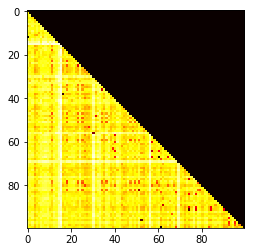

In [93]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#a = np.random.random((16, 16))
plt.imshow(comparisons_map, cmap='hot', interpolation='nearest')
plt.show()

In [94]:
def takeThird(elem):
    return elem[2]
comparisons_list.sort(key=takeThird)
print(comparisons_list)

[[12, 0, 0.026562320999687642, 0.39095401763916016, 304.61195731163025], [99, 61, 0.10583091901509335, 1.2287471294403076, 45138.461559295654], [67, 60, 0.1280414918122122, 1.8990845680236816, 16903.685976743698], [38, 16, 0.265059808793501, 3.09911847114563, 4029.966895341873], [91, 74, 0.42896951465735506, 1.8920066356658936, 30665.56476187706], [96, 52, 0.49681468147145996, 0.6854939460754395, 43168.10867524147], [56, 30, 0.7379089829615808, 0.248307466506958, 10792.451865911484], [82, 51, 0.872241229021158, 2.056649923324585, 24539.722990989685], [64, 57, 1.0303193134432156, 1.7963738441467285, 14716.59916305542], [89, 62, 1.1195214214251308, 1.880068063735962, 29038.579086065292], [36, 34, 1.1269306164120116, 1.7074370384216309, 3692.332421541214], [77, 74, 1.2304660234261702, 2.616204261779785, 22055.848623514175], [25, 23, 1.2607151850944753, 5.9586546421051025, 1502.90944480896], [91, 77, 1.3037125971827392, 3.60160493850708, 30687.068999052048], [67, 64, 1.3482860699867054, 3.

In [95]:
job_postings.iloc[comparisons_list[0][0]]

Unnamed: 0                                                    12
Title                                             data scientist
Description    ProKarma is currently seeking a Data Scientist...
Company                                             Prokarma Inc
Location                                            Portland, OR
Name: 12, dtype: object

In [96]:
job_postings.iloc[comparisons_list[0][1]]

Unnamed: 0                                                     0
Title                                             data scientist
Description    Description\n\nProKarma is currently seeking a...
Company                                                 ProKarma
Location                                      Portland, OR 97204
Name: 0, dtype: object

In [97]:
pd.DataFrame(comparisons_map).to_csv('comparisons_map.csv')

In [98]:
pd.DataFrame(comparisons_list).to_csv('comparisons_list.csv')

In [69]:
print(descriptions.describe())

count                                                  3982
unique                                                 3798
top       iSenpai is a Woman Owned Small Business (WOSB)...
freq                                                     14
Name: Description, dtype: object
